# Data Collection

We will import the following libraries into the lab

In [1]:
# Requests allows us to make HTTP requests which we will use to get data from an API
import requests
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Datetime is a library that allows us to represent dates
import datetime

# Setting this option will print all collumns of a dataframe
pd.set_option('display.max_columns', None)
# Setting this option will print all of the data in a feature
pd.set_option('display.max_colwidth', None)

Below we will define a series of helper functions that will help us use the API to extract information using identification numbers in the launch data.

From the rocket column we would like to learn the booster name.

In [2]:
# Takes the dataset and uses the rocket column to call the API and append the data to the list
def getBoosterVersion(data):
    for x in data['rocket']:
       if x:
        response = requests.get("https://api.spacexdata.com/v4/rockets/"+str(x)).json()
        BoosterVersion.append(response['name'])

From the launchpad we would like to know the name of the launch site being used, the logitude, and the latitude.

In [3]:
# Takes the dataset and uses the launchpad column to call the API and append the data to the list
def getLaunchSite(data):
    for x in data['launchpad']:
       if x:
         response = requests.get("https://api.spacexdata.com/v4/launchpads/"+str(x)).json()
         Longitude.append(response['longitude'])
         Latitude.append(response['latitude'])
         LaunchSite.append(response['name'])

From the payload we would like to learn the mass of the payload and the orbit that it is going to.

In [4]:
# Takes the dataset and uses the payloads column to call the API and append the data to the lists
def getPayloadData(data):
    for load in data['payloads']:
       if load:
        response = requests.get("https://api.spacexdata.com/v4/payloads/"+load).json()
        PayloadMass.append(response['mass_kg'])
        Orbit.append(response['orbit'])

From cores we would like to learn the outcome of the landing, the type of the landing, number of flights with that core, whether gridfins were used, wheter the core is reused, wheter legs were used, the landing pad used, the block of the core which is a number used to seperate version of cores, the number of times this specific core has been reused, and the serial of the core.

In [5]:
# Takes the dataset and uses the cores column to call the API and append the data to the lists
def getCoreData(data):
    for core in data['cores']:
            if core['core'] != None:
                response = requests.get("https://api.spacexdata.com/v4/cores/"+core['core']).json()
                Block.append(response['block'])
                ReusedCount.append(response['reuse_count'])
                Serial.append(response['serial'])
            else:
                Block.append(None)
                ReusedCount.append(None)
                Serial.append(None)
            Outcome.append(str(core['landing_success'])+' '+str(core['landing_type']))
            Flights.append(core['flight'])
            GridFins.append(core['gridfins'])
            Reused.append(core['reused'])
            Legs.append(core['legs'])
            LandingPad.append(core['landpad'])

Now let's start requesting rocket launch data from SpaceX API with the following URL:

In [6]:
spacex_url="https://api.spacexdata.com/v4/launches/past"

In [7]:
response = requests.get(spacex_url)

Check the content of the response

In [8]:
print(response.content)

b'[{"fairings":{"reused":false,"recovery_attempt":false,"recovered":false,"ships":[]},"links":{"patch":{"small":"https://images2.imgbox.com/94/f2/NN6Ph45r_o.png","large":"https://images2.imgbox.com/5b/02/QcxHUb5V_o.png"},"reddit":{"campaign":null,"launch":null,"media":null,"recovery":null},"flickr":{"small":[],"original":[]},"presskit":null,"webcast":"https://www.youtube.com/watch?v=0a_00nJ_Y88","youtube_id":"0a_00nJ_Y88","article":"https://www.space.com/2196-spacex-inaugural-falcon-1-rocket-lost-launch.html","wikipedia":"https://en.wikipedia.org/wiki/DemoSat"},"static_fire_date_utc":"2006-03-17T00:00:00.000Z","static_fire_date_unix":1142553600,"net":false,"window":0,"rocket":"5e9d0d95eda69955f709d1eb","success":false,"failures":[{"time":33,"altitude":null,"reason":"merlin engine failure"}],"details":"Engine failure at 33 seconds and loss of vehicle","crew":[],"ships":[],"capsules":[],"payloads":["5eb0e4b5b6c3bb0006eeb1e1"],"launchpad":"5e9e4502f5090995de566f86","flight_number":1,"name

You should see the response contains massive information about SpaceX launches. Next, let's try to discover some more relevant information for this project.

## Task 1: Request and parse the SpaceX launch data using the GET request¶

To make the requested JSON results more consistent, we will use the following static response object for this project:

In [9]:
static_json_url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/API_call_spacex_api.json'

We should see that the request was successfull with the 200 status response code

In [10]:
response.status_code

200

Now we decode the response content as a Json using .json() and turn it into a Pandas dataframe using .json_normalize()

In [11]:
# Use json_normalize meethod to convert the json result into a dataframe
# Importing necessary libraries
import requests
import pandas as pd

# Setting options to display all columns and full data
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# Static JSON URL for the project
static_json_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/API_call_spacex_api.json'

# Making a GET request to the static JSON URL
response = requests.get(static_json_url)

# Checking if the request was successful
if response.status_code == 200:
    print("Request was successful!")
else:
    print("Request failed!")

# Decoding the response content as JSON
data = response.json()

# Converting the JSON result into a DataFrame using json_normalize
df = pd.json_normalize(data)

# Displaying the DataFrame
print(df.head())

Request was successful!
       static_fire_date_utc  static_fire_date_unix    tbd    net  window  \
0  2006-03-17T00:00:00.000Z           1.142554e+09  False  False     0.0   
1                      None                    NaN  False  False     0.0   
2                      None                    NaN  False  False     0.0   
3  2008-09-20T00:00:00.000Z           1.221869e+09  False  False     0.0   
4                      None                    NaN  False  False     0.0   

                     rocket  success  \
0  5e9d0d95eda69955f709d1eb    False   
1  5e9d0d95eda69955f709d1eb    False   
2  5e9d0d95eda69955f709d1eb    False   
3  5e9d0d95eda69955f709d1eb     True   
4  5e9d0d95eda69955f709d1eb     True   

                                                                                                                                                                                details  \
0                                                                                          

You will notice that a lot of the data are IDs. For example the rocket column has no information about the rocket just an identification number.

We will now use the API again to get information about the launches using the IDs given for each launch. Specifically we will be using columns rocket, payloads, launchpad, and cores.

In [12]:
import pandas as pd
import requests
import datetime

# Static JSON URL for the project
static_json_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/API_call_spacex_api.json'

# Making a GET request to the static JSON URL
response = requests.get(static_json_url)

# Checking if the request was successful
if response.status_code == 200:
    print("Request was successful!")
else:
    print("Request failed!")

# Decoding the response content as JSON
data = response.json()

# Converting the JSON result into a DataFrame using json_normalize
df = pd.json_normalize(data)

# Ensure 'df' is a DataFrame
if isinstance(df, pd.DataFrame):
    # Lets take a subset of our dataframe keeping only the features we want and the flight number, and date_utc
    df = df[['rocket', 'payloads', 'launchpad', 'cores', 'flight_number', 'date_utc']]

    # We will remove rows with multiple cores because those are falcon rockets with 2 extra rocket boosters and rows that have multiple payloads in a single rocket
    df = df[df['cores'].map(len) == 1]
    df = df[df['payloads'].map(len) == 1]

    # Since payloads and cores are lists of size 1 we will also extract the single value in the list and replace the feature
    df['cores'] = df['cores'].map(lambda x: x[0])
    df['payloads'] = df['payloads'].map(lambda x: x[0])

    # We also want to convert the date_utc to a datetime datatype and then extracting the date leaving the time
    df['date'] = pd.to_datetime(df['date_utc']).dt.date

    # Using the date we will restrict the dates of the launches
    df = df[df['date'] <= datetime.date(2020, 11, 13)]

    print(df.head())
else:
    print("The variable 'data' is not a DataFrame.")


Request was successful!
                     rocket                  payloads  \
0  5e9d0d95eda69955f709d1eb  5eb0e4b5b6c3bb0006eeb1e1   
1  5e9d0d95eda69955f709d1eb  5eb0e4b6b6c3bb0006eeb1e2   
3  5e9d0d95eda69955f709d1eb  5eb0e4b7b6c3bb0006eeb1e5   
4  5e9d0d95eda69955f709d1eb  5eb0e4b7b6c3bb0006eeb1e6   
5  5e9d0d95eda69973a809d1ec  5eb0e4b7b6c3bb0006eeb1e7   

                  launchpad  \
0  5e9e4502f5090995de566f86   
1  5e9e4502f5090995de566f86   
3  5e9e4502f5090995de566f86   
4  5e9e4502f5090995de566f86   
5  5e9e4501f509094ba4566f84   

                                                                                                                                                                                            cores  \
0  {'core': '5e9e289df35918033d3b2623', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}   
1  {'core': '5e9e289ef35918416a3b2624', 'flight': 1,

From the rocket we would like to learn the booster name

From the payload we would like to learn the mass of the payload and the orbit that it is going to

From the launchpad we would like to know the name of the launch site being used, the longitude, and the latitude.

From cores we would like to learn the outcome of the landing, the type of the landing, number of flights with that core, whether gridfins were used, whether the core is reused, whether legs were used, the landing pad used, the block of the core which is a number used to seperate version of cores, the number of times this specific core has been reused, and the serial of the core.

The data from these requests will be stored in lists and will be used to create a new dataframe.

In [13]:
#Global variables
BoosterVersion = []
PayloadMass = []
Orbit = []
LaunchSite = []
Outcome = []
Flights = []
GridFins = []
Reused = []
Legs = []
LandingPad = []
Block = []
ReusedCount = []
Serial = []
Longitude = []
Latitude = []

These functions will apply the outputs globally to the above variables. Let's take a looks at BoosterVersion variable. Before we apply getBoosterVersion the list is empty:

In [14]:
BoosterVersion

[]

Now, let's apply  getBoosterVersion function method to get the booster version

In [15]:
import pandas as pd
import requests
import datetime

# Static JSON URL for the project
static_json_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/API_call_spacex_api.json'

# Making a GET request to the static JSON URL
response = requests.get(static_json_url)

# Checking if the request was successful
if response.status_code == 200:
    print("Request was successful!")
else:
    print("Request failed!")

# Decoding the response content as JSON
data = response.json()

# Converting the JSON result into a DataFrame using json_normalize
df = pd.json_normalize(data)

# Ensure 'df' is a DataFrame
if isinstance(df, pd.DataFrame):
    # Let's take a subset of our dataframe keeping only the features we want and the flight number, and date_utc
    df = df[['rocket', 'payloads', 'launchpad', 'cores', 'flight_number', 'date_utc']]

    # We will remove rows with multiple cores because those are falcon rockets with 2 extra rocket boosters and rows that have multiple payloads in a single rocket
    df = df[df['cores'].map(len) == 1]
    df = df[df['payloads'].map(len) == 1]

    # Since payloads and cores are lists of size 1 we will also extract the single value in the list and replace the feature
    df['cores'] = df['cores'].map(lambda x: x[0])
    df['payloads'] = df['payloads'].map(lambda x: x[0])

    # We also want to convert the date_utc to a datetime datatype and then extracting the date leaving the time
    df['date'] = pd.to_datetime(df['date_utc']).dt.date

    # Using the date we will restrict the dates of the launches
    df = df[df['date'] <= datetime.date(2020, 11, 13)]

    # Global variables to store API data
    BoosterVersion = []
    PayloadMass = []
    Orbit = []
    LaunchSite = []
    Outcome = []
    Flights = []
    GridFins = []
    Reused = []
    Legs = []
    LandingPad = []
    Block = []
    ReusedCount = []
    Serial = []
    Longitude = []
    Latitude = []

    # Function to get booster version
    def getBoosterVersion(df):
        for x in df['rocket']:
            if x:
                response = requests.get("https://api.spacexdata.com/v4/rockets/"+str(x))
                if response.status_code == 200:
                    response_json = response.json()
                    BoosterVersion.append(response_json['name'])
                else:
                    BoosterVersion.append(None)

    # Function to get launch site details
    def getLaunchSite(df):
        for x in df['launchpad']:
            if x:
                response = requests.get("https://api.spacexdata.com/v4/launchpads/"+str(x))
                if response.status_code == 200:
                    response_json = response.json()
                    Longitude.append(response_json['longitude'])
                    Latitude.append(response_json['latitude'])
                    LaunchSite.append(response_json['name'])
                else:
                    Longitude.append(None)
                    Latitude.append(None)
                    LaunchSite.append(None)

    # Function to get payload details
    def getPayloadData(df):
        for load in df['payloads']:
            if load:
                response = requests.get("https://api.spacexdata.com/v4/payloads/"+load)
                if response.status_code == 200:
                    response_json = response.json()
                    PayloadMass.append(response_json.get('mass_kg'))
                    Orbit.append(response_json.get('orbit'))
                else:
                    PayloadMass.append(None)
                    Orbit.append(None)

    # Function to get core details
    def getCoreData(df):
        for core in df['cores']:
            if core['core'] != None:
                response = requests.get("https://api.spacexdata.com/v4/cores/"+core['core'])
                if response.status_code == 200:
                    response_json = response.json()
                    Block.append(response_json.get('block'))
                    ReusedCount.append(response_json.get('reuse_count'))
                    Serial.append(response_json.get('serial'))
                else:
                    Block.append(None)
                    ReusedCount.append(None)
                    Serial.append(None)
                Outcome.append(str(core.get('landing_success')) + ' ' + str(core.get('landing_type')))
                Flights.append(core.get('flight'))
                GridFins.append(core.get('gridfins'))
                Reused.append(core.get('reused'))
                Legs.append(core.get('legs'))
                LandingPad.append(core.get('landpad'))

    # Call the functions to populate the data
    getBoosterVersion(df)
    getLaunchSite(df)
    getPayloadData(df)
    getCoreData(df)

    # Create the final DataFrame with the extracted information
    final_df = pd.DataFrame({
        'FlightNumber': df['flight_number'],
        'Date': df['date'],
        'BoosterVersion': BoosterVersion,
        'PayloadMass': PayloadMass,
        'Orbit': Orbit,
        'LaunchSite': LaunchSite,
        'Outcome': Outcome,
        'Flights': Flights,
        'GridFins': GridFins,
        'Reused': Reused,
        'Legs': Legs,
        'LandingPad': LandingPad,
        'Block': Block,
        'ReusedCount': ReusedCount,
        'Serial': Serial,
        'Longitude': Longitude,
        'Latitude': Latitude
    })

    # Display the final DataFrame
    print(final_df.head())
else:
    print("The variable 'data' is not a DataFrame.")


Request was successful!
   FlightNumber        Date BoosterVersion  PayloadMass Orbit  \
0             1  2006-03-24       Falcon 1         20.0   LEO   
1             2  2007-03-21       Falcon 1          NaN   LEO   
3             4  2008-09-28       Falcon 1        165.0   LEO   
4             5  2009-07-13       Falcon 1        200.0   LEO   
5             6  2010-06-04       Falcon 9          NaN   LEO   

        LaunchSite    Outcome  Flights  GridFins  Reused   Legs LandingPad  \
0  Kwajalein Atoll  None None        1     False   False  False       None   
1  Kwajalein Atoll  None None        1     False   False  False       None   
3  Kwajalein Atoll  None None        1     False   False  False       None   
4  Kwajalein Atoll  None None        1     False   False  False       None   
5     CCSFS SLC 40  None None        1     False   False  False       None   

   Block  ReusedCount    Serial   Longitude   Latitude  
0    NaN            0  Merlin1A  167.743129   9.047721  
1 

the list has now been update

In [16]:
BoosterVersion[0:5]

['Falcon 1', 'Falcon 1', 'Falcon 1', 'Falcon 1', 'Falcon 9']

we can apply the rest of the functions here:

In [17]:
# Call the functions to populate the data
getBoosterVersion(df)
getLaunchSite(df)
getPayloadData(df)
getCoreData(df)

## Task 2: Filter the dataframe to only include Falcon 9 launches

Finally lets construct our dataset using the data we have obtained. We we combine the columns into a dictionary.

In [18]:
import pandas as pd
import requests
import datetime

# Static JSON URL for the project
static_json_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/API_call_spacex_api.json'

# Making a GET request to the static JSON URL
response = requests.get(static_json_url)

# Checking if the request was successful
if response.status_code == 200:
    print("Request was successful!")
else:
    print("Request failed!")

# Decoding the response content as JSON
data = response.json()

# Converting the JSON result into a DataFrame using json_normalize
df = pd.json_normalize(data)

# Ensure 'df' is a DataFrame
if isinstance(df, pd.DataFrame):
    # Let's take a subset of our dataframe keeping only the features we want and the flight number, and date_utc
    df = df[['rocket', 'payloads', 'launchpad', 'cores', 'flight_number', 'date_utc']]

    # We will remove rows with multiple cores because those are falcon rockets with 2 extra rocket boosters and rows that have multiple payloads in a single rocket
    df = df[df['cores'].map(len) == 1]
    df = df[df['payloads'].map(len) == 1]

    # Since payloads and cores are lists of size 1 we will also extract the single value in the list and replace the feature
    df['cores'] = df['cores'].map(lambda x: x[0])
    df['payloads'] = df['payloads'].map(lambda x: x[0])

    # We also want to convert the date_utc to a datetime datatype and then extracting the date leaving the time
    df['date'] = pd.to_datetime(df['date_utc']).dt.date

    # Using the date we will restrict the dates of the launches
    df = df[df['date'] <= datetime.date(2020, 11, 13)]

    # Global variables to store API data
    BoosterVersion = []
    PayloadMass = []
    Orbit = []
    LaunchSite = []
    Outcome = []
    Flights = []
    GridFins = []
    Reused = []
    Legs = []
    LandingPad = []
    Block = []
    ReusedCount = []
    Serial = []
    Longitude = []
    Latitude = []

    # Function to get booster version
    def getBoosterVersion(df):
        for x in df['rocket']:
            if x:
                response = requests.get("https://api.spacexdata.com/v4/rockets/"+str(x))
                if response.status_code == 200:
                    response_json = response.json()
                    BoosterVersion.append(response_json['name'])
                else:
                    BoosterVersion.append(None)

    # Function to get launch site details
    def getLaunchSite(df):
        for x in df['launchpad']:
            if x:
                response = requests.get("https://api.spacexdata.com/v4/launchpads/"+str(x))
                if response.status_code == 200:
                    response_json = response.json()
                    Longitude.append(response_json['longitude'])
                    Latitude.append(response_json['latitude'])
                    LaunchSite.append(response_json['name'])
                else:
                    Longitude.append(None)
                    Latitude.append(None)
                    LaunchSite.append(None)

    # Function to get payload details
    def getPayloadData(df):
        for load in df['payloads']:
            if load:
                response = requests.get("https://api.spacexdata.com/v4/payloads/"+load)
                if response.status_code == 200:
                    response_json = response.json()
                    PayloadMass.append(response_json.get('mass_kg'))
                    Orbit.append(response_json.get('orbit'))
                else:
                    PayloadMass.append(None)
                    Orbit.append(None)

    # Function to get core details
    def getCoreData(df):
        for core in df['cores']:
            if core['core'] != None:
                response = requests.get("https://api.spacexdata.com/v4/cores/"+core['core'])
                if response.status_code == 200:
                    response_json = response.json()
                    Block.append(response_json.get('block'))
                    ReusedCount.append(response_json.get('reuse_count'))
                    Serial.append(response_json.get('serial'))
                else:
                    Block.append(None)
                    ReusedCount.append(None)
                    Serial.append(None)
                Outcome.append(str(core.get('landing_success')) + ' ' + str(core.get('landing_type')))
                Flights.append(core.get('flight'))
                GridFins.append(core.get('gridfins'))
                Reused.append(core.get('reused'))
                Legs.append(core.get('legs'))
                LandingPad.append(core.get('landpad'))

    # Call the functions to populate the data
    getBoosterVersion(df)
    getLaunchSite(df)
    getPayloadData(df)
    getCoreData(df)

    # Check the lengths again
    print("FlightNumber:", len(df['flight_number']))
    print("Date:", len(df['date']))
    print("BoosterVersion:", len(BoosterVersion))
    print("PayloadMass:", len(PayloadMass))
    print("Orbit:", len(Orbit))
    print("LaunchSite:", len(LaunchSite))
    print("Outcome:", len(Outcome))
    print("Flights:", len(Flights))
    print("GridFins:", len(GridFins))
    print("Reused:", len(Reused))
    print("Legs:", len(Legs))
    print("LandingPad:", len(LandingPad))
    print("Block:", len(Block))
    print("ReusedCount:", len(ReusedCount))
    print("Serial:", len(Serial))
    print("Longitude:", len(Longitude))
    print("Latitude:", len(Latitude))

    # Construct the final dataset
    min_length = min(len(df['flight_number']), len(BoosterVersion), len(PayloadMass), len(Orbit), len(LaunchSite), len(Outcome), len(Flights), len(GridFins), len(Reused), len(Legs), len(LandingPad), len(Block), len(ReusedCount), len(Serial), len(Longitude), len(Latitude))

    launch_dict = {
        'FlightNumber': list(df['flight_number'])[:min_length],
        'Date': list(df['date'])[:min_length],
        'BoosterVersion': BoosterVersion[:min_length],
        'PayloadMass': PayloadMass[:min_length],
        'Orbit': Orbit[:min_length],
        'LaunchSite': LaunchSite[:min_length],
        'Outcome': Outcome[:min_length],
        'Flights': Flights[:min_length],
        'GridFins': GridFins[:min_length],
        'Reused': Reused[:min_length],
        'Legs': Legs[:min_length],
        'LandingPad': LandingPad[:min_length],
        'Block': Block[:min_length],
        'ReusedCount': ReusedCount[:min_length],
        'Serial': Serial[:min_length],
        'Longitude': Longitude[:min_length],
        'Latitude': Latitude[:min_length]
    }


    launch_df = pd.DataFrame(launch_dict)

    print(launch_df.head())
else:
    print("The variable 'data' is not a DataFrame.")



Request was successful!
FlightNumber: 94
Date: 94
BoosterVersion: 94
PayloadMass: 94
Orbit: 94
LaunchSite: 94
Outcome: 94
Flights: 94
GridFins: 94
Reused: 94
Legs: 94
LandingPad: 94
Block: 94
ReusedCount: 94
Serial: 94
Longitude: 94
Latitude: 94
   FlightNumber        Date BoosterVersion  PayloadMass Orbit  \
0             1  2006-03-24       Falcon 1         20.0   LEO   
1             2  2007-03-21       Falcon 1          NaN   LEO   
2             4  2008-09-28       Falcon 1        165.0   LEO   
3             5  2009-07-13       Falcon 1        200.0   LEO   
4             6  2010-06-04       Falcon 9          NaN   LEO   

        LaunchSite    Outcome  Flights  GridFins  Reused   Legs LandingPad  \
0  Kwajalein Atoll  None None        1     False   False  False       None   
1  Kwajalein Atoll  None None        1     False   False  False       None   
2  Kwajalein Atoll  None None        1     False   False  False       None   
3  Kwajalein Atoll  None None        1     False   

Then, we need to create a Pandas data frame from the dictionary launch_dict.

In [19]:
# Create a data from launch_dict
launch_df = pd.DataFrame(launch_dict)

print(launch_df.head())
print(launch_df.describe())

   FlightNumber        Date BoosterVersion  PayloadMass Orbit  \
0             1  2006-03-24       Falcon 1         20.0   LEO   
1             2  2007-03-21       Falcon 1          NaN   LEO   
2             4  2008-09-28       Falcon 1        165.0   LEO   
3             5  2009-07-13       Falcon 1        200.0   LEO   
4             6  2010-06-04       Falcon 9          NaN   LEO   

        LaunchSite    Outcome  Flights  GridFins  Reused   Legs LandingPad  \
0  Kwajalein Atoll  None None        1     False   False  False       None   
1  Kwajalein Atoll  None None        1     False   False  False       None   
2  Kwajalein Atoll  None None        1     False   False  False       None   
3  Kwajalein Atoll  None None        1     False   False  False       None   
4     CCSFS SLC 40  None None        1     False   False  False       None   

   Block  ReusedCount    Serial   Longitude   Latitude  
0    NaN            0  Merlin1A  167.743129   9.047721  
1    NaN            0  Mer

Show the summary of the dataframe

In [20]:
# Show the head of the dataframe
data_falcon9 = launch_df[launch_df['BoosterVersion'] != 'Falcon 1']
print(data_falcon9.head())

print(data_falcon9.describe())

   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
4             6  2010-06-04       Falcon 9          NaN   LEO  CCSFS SLC 40   
5             8  2012-05-22       Falcon 9        525.0   LEO  CCSFS SLC 40   
6            10  2013-03-01       Falcon 9        677.0   ISS  CCSFS SLC 40   
7            11  2013-09-29       Falcon 9        500.0    PO   VAFB SLC 4E   
8            12  2013-12-03       Falcon 9       3170.0   GTO  CCSFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
4    None None        1     False   False  False       None    1.0   
5    None None        1     False   False  False       None    1.0   
6    None None        1     False   False  False       None    1.0   
7  False Ocean        1     False   False  False       None    1.0   
8    None None        1     False   False  False       None    1.0   

   ReusedCount Serial   Longitude   Latitude  
4            0  B0003  -80.577366  28.561857  
5         

Now that we have removed some values we should reset the FlgihtNumber column

In [21]:
data_falcon9.loc[:,'FlightNumber'] = list(range(1, data_falcon9.shape[0]+1))
data_falcon9

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
4,1,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857
5,2,2012-05-22,Falcon 9,525.0,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0005,-80.577366,28.561857
6,3,2013-03-01,Falcon 9,677.0,ISS,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0007,-80.577366,28.561857
7,4,2013-09-29,Falcon 9,500.0,PO,VAFB SLC 4E,False Ocean,1,False,False,False,None,1.0,0,B1003,-120.610829,34.632093
8,5,2013-12-03,Falcon 9,3170.0,GTO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B1004,-80.577366,28.561857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,86,2020-09-03,Falcon 9,15600.0,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1060,-80.603956,28.608058
90,87,2020-10-06,Falcon 9,15600.0,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,13,B1058,-80.603956,28.608058
91,88,2020-10-18,Falcon 9,15600.0,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1051,-80.603956,28.608058
92,89,2020-10-24,Falcon 9,15600.0,VLEO,CCSFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,12,B1060,-80.577366,28.561857


# Data wrangling

In this lab, we will perform some Exploratory Data Analysis (EDA) to find some patterns in the data and determine what would be the label for training supervised models.

In the data set, there are several different cases where the booster did not land successfully. Sometimes a landing was attempted but failed due to an accident; for example, True Ocean means the mission outcome was successfully landed to a specific region of the ocean while False Ocean means the mission outcome was unsuccessfully landed to a specific region of the ocean. True RTLS means the mission outcome was successfully landed to a ground pad False RTLS means the mission outcome was unsuccessfully landed to a ground pad.True ASDS means the mission outcome was successfully landed on a drone ship False ASDS means the mission outcome was unsuccessfully landed on a drone ship.

In this lab we will mainly convert those outcomes into Training Labels with 1 means the booster successfully landed 0 means it was unsuccessful.







Falcon 9 first stage will land successfully

Objectives
Perform exploratory Data Analysis and determine Training Labels

Exploratory Data Analysis
Determine Training Labels

## Import Libraries and Define Auxiliary Functions

We will import the following libraries.

In [22]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np

Data Analysis

Load Space X dataset, from last section.

In [23]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_1.csv")
df.head(10)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857
5,6,2014-01-06,Falcon 9,3325.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1005,-80.577366,28.561857
6,7,2014-04-18,Falcon 9,2296.000000,ISS,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1006,-80.577366,28.561857
7,8,2014-07-14,Falcon 9,1316.000000,LEO,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1007,-80.577366,28.561857
8,9,2014-08-05,Falcon 9,4535.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1008,-80.577366,28.561857
9,10,2014-09-07,Falcon 9,4428.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1011,-80.577366,28.561857


Identify and calculate the percentage of the missing values in each attribute

In [24]:
df.isnull().sum()/len(df)*100

FlightNumber       0.000000
Date               0.000000
BoosterVersion     0.000000
PayloadMass        0.000000
Orbit              0.000000
LaunchSite         0.000000
Outcome            0.000000
Flights            0.000000
GridFins           0.000000
Reused             0.000000
Legs               0.000000
LandingPad        28.888889
Block              0.000000
ReusedCount        0.000000
Serial             0.000000
Longitude          0.000000
Latitude           0.000000
dtype: float64

Identify which columns are numerical and categorical:

## TASK 1: Calculate the number of launches on each site

The data contains several Space X launch facilities: Cape Canaveral Space Launch Complex 40 VAFB SLC 4E , Vandenberg Air Force Base Space Launch Complex 4E (SLC-4E), Kennedy Space Center Launch Complex 39A KSC LC 39A .The location of each Launch Is placed in the column LaunchSite

Next, let's see the number of launches for each site.

Use the method value_counts() on the column LaunchSite to determine the number of launches on each site:

In [25]:
# Apply value_counts() on column LaunchSite
launch_counts = df['LaunchSite'].value_counts()
print(launch_counts)

LaunchSite
CCAFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: count, dtype: int64


## TASK 2: Calculate the number and occurrence of each orbit


Use the method .value_counts() to determine the number and occurrence of each orbit in the column Orbit

In [26]:
# Apply value_counts on Orbit column
orbit_counts = df['Orbit'].value_counts()

print("Number and Occurrence of Each Orbit:")
print(orbit_counts)

Number and Occurrence of Each Orbit:
Orbit
GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
ES-L1     1
HEO       1
SO        1
GEO       1
Name: count, dtype: int64


## TASK 3: Calculate the number and occurence of mission outcome of the orbits

Use the method .value_counts() on the column Outcome to determine the number of landing_outcomes.Then assign it to a variable landing_outcomes.

In [27]:
landing_outcomes = df['Outcome'].value_counts()
print("Number and Occurrence of Mission Outcomes:")
print(landing_outcomes)

Number and Occurrence of Mission Outcomes:
Outcome
True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
Name: count, dtype: int64


True Ocean means the mission outcome was successfully landed to a specific region of the ocean while False Ocean means the mission outcome was unsuccessfully landed to a specific region of the ocean. True RTLS means the mission outcome was successfully landed to a ground pad False RTLS means the mission outcome was unsuccessfully landed to a ground pad.True ASDS means the mission outcome was successfully landed to a drone ship False ASDS means the mission outcome was unsuccessfully landed to a drone ship. None ASDS and None None these represent a failure to land.

In [28]:
for i,outcome in enumerate(landing_outcomes.keys()):
    print(i,outcome)

0 True ASDS
1 None None
2 True RTLS
3 False ASDS
4 True Ocean
5 False Ocean
6 None ASDS
7 False RTLS


We create a set of outcomes where the second stage did not land successfully:

In [29]:
bad_outcomes=set(landing_outcomes.keys()[[1,3,5,6,7]])
bad_outcomes

{'False ASDS', 'False Ocean', 'False RTLS', 'None ASDS', 'None None'}

## TASK 4: Create a landing outcome label from Outcome column

Using the Outcome, create a list where the element is zero if the corresponding row in Outcome is in the set bad_outcome; otherwise, it's one. Then assign it to the variable landing_class:

In [30]:
# landing_class = 0 if bad_outcome
# landing_class = 1 otherwise
landing_class = df['Outcome'].apply(lambda x: 0 if x in bad_outcomes else 1)

This variable will represent the classification variable that represents the outcome of each launch. If the value is zero, the first stage did not land successfully; one means the first stage landed Successfully

In [31]:
df['Class']=landing_class
df[['Class']].head(8)

,Class
0,0
1,0
2,0
3,0
4,0
5,0
6,1
7,1


In [32]:
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


We can use the following line of code to determine the success rate:

In [33]:
df["Class"].mean()

0.6666666666666666

We can now export it to a CSV for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.

In [34]:
# df.to_csv("dataset_part_2.csv", index=False)

In [35]:
df.to_csv("dataset_part_2.csv", index=False)

# EDA with SQL

Skills Network Logo

Assignment: SQL Notebook for Peer Assignment
Estimated time needed: 60 minutes.

Introduction
Using this Python notebook you will:

Understand the Spacex DataSet
Load the dataset into the corresponding table in a Db2 database
Execute SQL queries to answer assignment questions


Overview of the DataSet
SpaceX has gained worldwide attention for a series of historic milestones.

It is the only private company ever to return a spacecraft from low-earth orbit, which it first accomplished in December 2010. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars wheras other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage.

Therefore if we can determine if the first stage will land, we can determine the cost of a launch.

This information can be used if an alternate company wants to bid against SpaceX for a rocket launch.

This dataset includes a record for each payload carried during a SpaceX mission into outer space.

Download the datasets
This assignment requires you to load the spacex dataset.

In many cases the dataset to be analyzed is available as a .CSV (comma separated values) file, perhaps on the internet. Click on the link below to download and save the dataset (.CSV file):

In [36]:
!pip install sqlalchemy==1.3.9

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 21.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sqlalchemy: filename=SQLAlchemy-1.3.9-cp310-cp310-linux_x86_64.whl size=1192333 sha256=d6540bdaa0b152e8bac033e8dcac87e397210998df2cc4be24b5ef634dae951f
  Stored in directory: /root/.cache/pip/wheels/8b/6d/9c/e1793e5a2d85b89b8c362a4f0e3def54b786bcd14923b9ff00
Successfully built sqlalchemy
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.30
    Uninstalling SQLAlchemy-2.0.30:
      Successfully uninstalled SQLAlchemy-2.0.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.8.0 requires sqlalchemy<3.0dev,>=1.4, but you have sqlalchemy 1.3.9 which is incompatible.
ipython-sql 0.5.0 requires sqlalchemy>=2.0, but you have sqlalchemy 1.3.9 which is incompatible.


Connect to the database
Let us first load the SQL extension and establish a connection with the database

In [37]:
#Please uncomment and execute the code below if you are working locally.

!pip install ipython-sql

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.0 MB/s eta 0:00:00
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 1.3.9
    Uninstalling SQLAlchemy-1.3.9:
      Successfully uninstalled SQLAlchemy-1.3.9


In [38]:
%load_ext sql
import csv, sqlite3

con = sqlite3.connect("my_data1.db")
cur = con.cursor()

#!pip install -q pandas==1.1.5

%sql sqlite:///my_data1.db

import pandas as pd
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/data/Spacex.csv")
df.to_sql("SPACEXTBL", con, if_exists='replace', index=False,method="multi")

101

Note:This below code is added to remove blank rows from table

In [39]:
%sql create table SPACEXTABLE as select * from SPACEXTBL where Date is not null

 * sqlite:///my_data1.db
Done.


[]

Tasks
Now write and execute SQL queries to solve the assignment tasks.

Note: If the column names are in mixed case enclose it in double quotes For Example "Landing_Outcome"

## Task 1
Display the names of the unique launch sites in the space mission

In [40]:
# Task 1
%sql SELECT DISTINCT "Launch_Site" FROM SPACEXTABLE

 * sqlite:///my_data1.db
Done.


Launch_Site
CCAFS LC-40
VAFB SLC-4E
KSC LC-39A
CCAFS SLC-40


## Task 2
Display 5 records where launch sites begin with the string 'CCA'

In [41]:
# Task 2
%sql SELECT * FROM SPACEXTABLE WHERE "Launch_Site" LIKE 'CCA%' LIMIT 5

 * sqlite:///my_data1.db
Done.


Date,Time (UTC),Booster_Version,Launch_Site,Payload,PAYLOAD_MASS__KG_,Orbit,Customer,Mission_Outcome,Landing_Outcome
2010-06-04,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success,Failure (parachute)
2010-12-08,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel of Brouere cheese",0,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute)
2012-05-22,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2,525,LEO (ISS),NASA (COTS),Success,No attempt
2012-10-08,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500,LEO (ISS),NASA (CRS),Success,No attempt
2013-03-01,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677,LEO (ISS),NASA (CRS),Success,No attempt


## Task 3
Display the total payload mass carried by boosters launched by NASA (CRS)

In [42]:
# Task 3
%sql SELECT SUM("PAYLOAD_MASS__KG_") FROM SPACEXTABLE WHERE "Mission_Outcome" LIKE 'NASA (CRS)%'


 * sqlite:///my_data1.db
Done.


"SUM(""PAYLOAD_MASS__KG_"")"
None


## Task 4
Display average payload mass carried by booster version F9 v1.1

In [43]:
# Task 4
%sql SELECT AVG("PAYLOAD_MASS__KG_") FROM SPACEXTABLE WHERE "Booster_Version" = 'F9 v1.1'


 * sqlite:///my_data1.db
Done.


"AVG(""PAYLOAD_MASS__KG_"")"
2928.4


## Task 5
List the date when the first succesful landing outcome in ground pad was acheived.
Hint:Use min function

In [44]:
# Task 5
%sql SELECT MIN("Date") FROM SPACEXTABLE WHERE "Landing_Outcome" = 'Success (ground pad)'


 * sqlite:///my_data1.db
Done.


"MIN(""Date"")"
2015-12-22


## Task 6
List the names of the boosters which have success in drone ship and have payload mass greater than 4000 but less than 6000

In [45]:
# Task 6
%sql SELECT "Booster_Version" FROM SPACEXTABLE WHERE "Landing_Outcome" = 'Success (drone ship)' AND "PAYLOAD_MASS__KG_" > 4000 AND "PAYLOAD_MASS__KG_" < 6000


 * sqlite:///my_data1.db
Done.


Booster_Version
F9 FT B1022
F9 FT B1026
F9 FT B1021.2
F9 FT B1031.2


## Task 7
List the total number of successful and failure mission outcomes

In [46]:
# Task 7
%sql SELECT "Mission_Outcome", COUNT(*) AS count FROM SPACEXTABLE GROUP BY "Mission_Outcome"

 * sqlite:///my_data1.db
Done.


Mission_Outcome,count
Failure (in flight),1
Success,98
Success,1
Success (payload status unclear),1


## Task 8
List the names of the booster_versions which have carried the maximum payload mass. Use a subquery

In [47]:
# Task 8
%sql SELECT "Booster_Version" FROM SPACEXTABLE WHERE "PAYLOAD_MASS__KG_" = (SELECT MAX("PAYLOAD_MASS__KG_") FROM SPACEXTABLE)


 * sqlite:///my_data1.db
Done.


Booster_Version
F9 B5 B1048.4
F9 B5 B1049.4
F9 B5 B1051.3
F9 B5 B1056.4
F9 B5 B1048.5
F9 B5 B1051.4
F9 B5 B1049.5
F9 B5 B1060.2
F9 B5 B1058.3
F9 B5 B1051.6


## Task 9
List the records which will display the month names, failure landing_outcomes in drone ship ,booster versions, launch_site for the months in year 2015.
Note: SQLLite does not support monthnames. So you need to use substr(Date, 6,2) as month to get the months and substr(Date,0,5)='2015' for year.

In [48]:
# Task 9
%sql SELECT substr("Date", 6, 2) AS month, "Landing_Outcome", "Booster_Version", "Launch_Site" FROM SPACEXTABLE WHERE substr("Date", 0, 5) = '2015' AND "Landing_Outcome" = 'Failure (drone ship)'


 * sqlite:///my_data1.db
Done.


month,Landing_Outcome,Booster_Version,Launch_Site
01,Failure (drone ship),F9 v1.1 B1012,CCAFS LC-40
04,Failure (drone ship),F9 v1.1 B1015,CCAFS LC-40


## Task 10
Rank the count of landing outcomes (such as Failure (drone ship) or Success (ground pad)) between the date 2010-06-04 and 2017-03-20, in descending order.

In [49]:
# Task 10
%sql SELECT "Landing_Outcome", COUNT(*) as count FROM SPACEXTABLE WHERE "Date" BETWEEN '2010-06-04' AND '2017-03-20' GROUP BY "Landing_Outcome" ORDER BY count DESC


 * sqlite:///my_data1.db
Done.


Landing_Outcome,count
No attempt,10
Success (drone ship),5
Failure (drone ship),5
Success (ground pad),3
Controlled (ocean),3
Uncontrolled (ocean),2
Failure (parachute),2
Precluded (drone ship),1


# EDA with Visualization Lab

In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.

Falcon 9 first stage will land successfully

Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans.

Objectives
Perform exploratory Data Analysis and Feature Engineering using Pandas and Matplotlib

Exploratory Data Analysis
Preparing Data Feature Engineering

Import Libraries and Define Auxiliary Functions

We will import the following libraries the lab

In [54]:
!pip install numpy pandas seaborn matplotlib

In [52]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

## Exploratory Data Analysis

First, let's read the SpaceX dataset into a Pandas dataframe and print its summary

In [56]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
df = pd.read_csv(URL)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the FlightNumber (indicating the continuous launch attempts.) and Payload variables would affect the launch outcome.

We can plot out the FlightNumber vs. PayloadMassand overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.

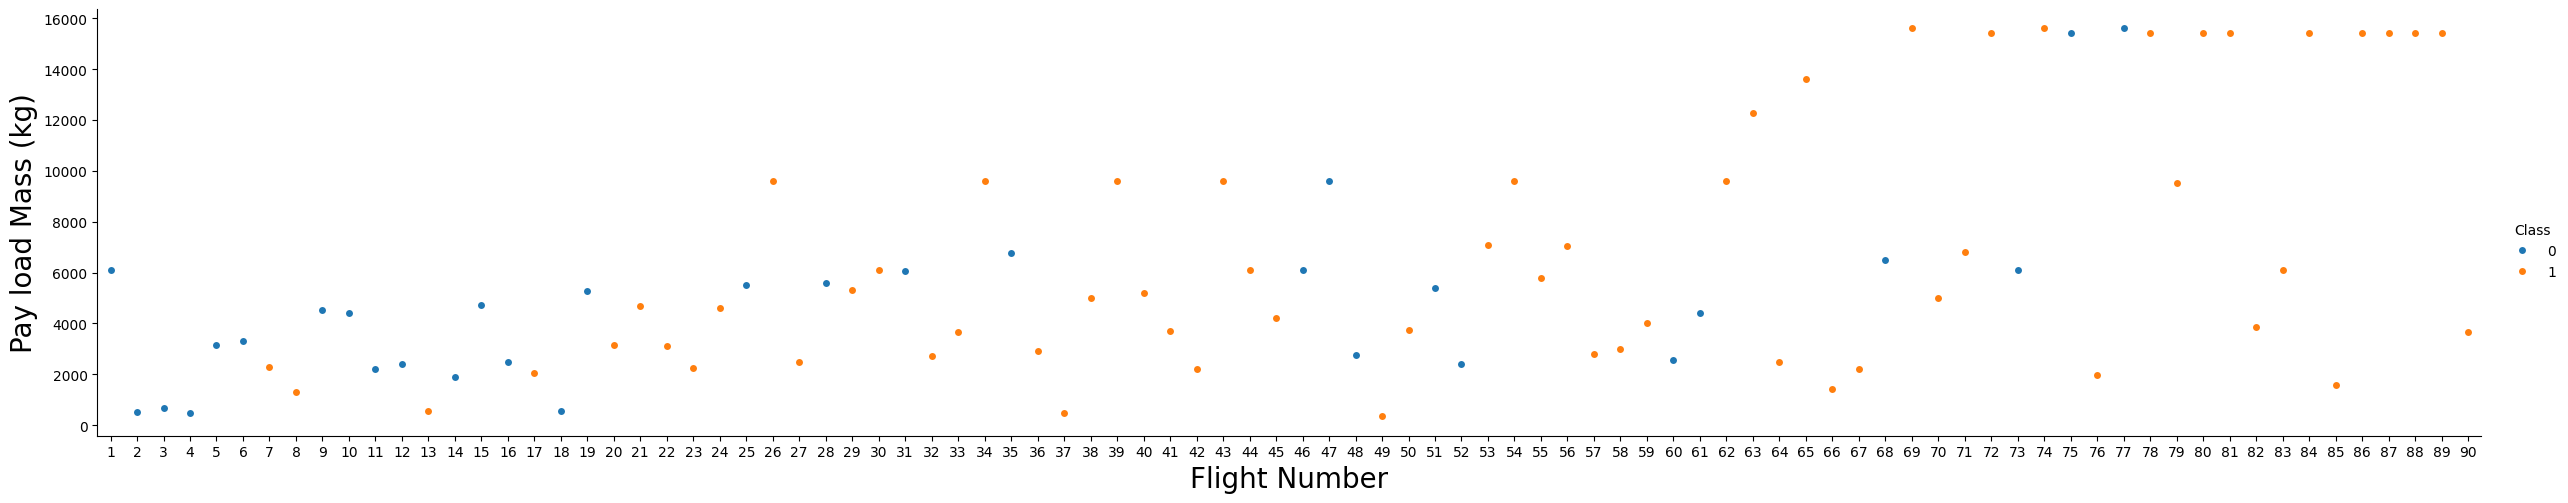

In [57]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

We see that different launch sites have different success rates. CCAFS LC-40, has a success rate of 60 %, while KSC LC-39A and VAFB SLC 4E has a success rate of 77%.

Next, let's drill down to each site visualize its detailed launch records.

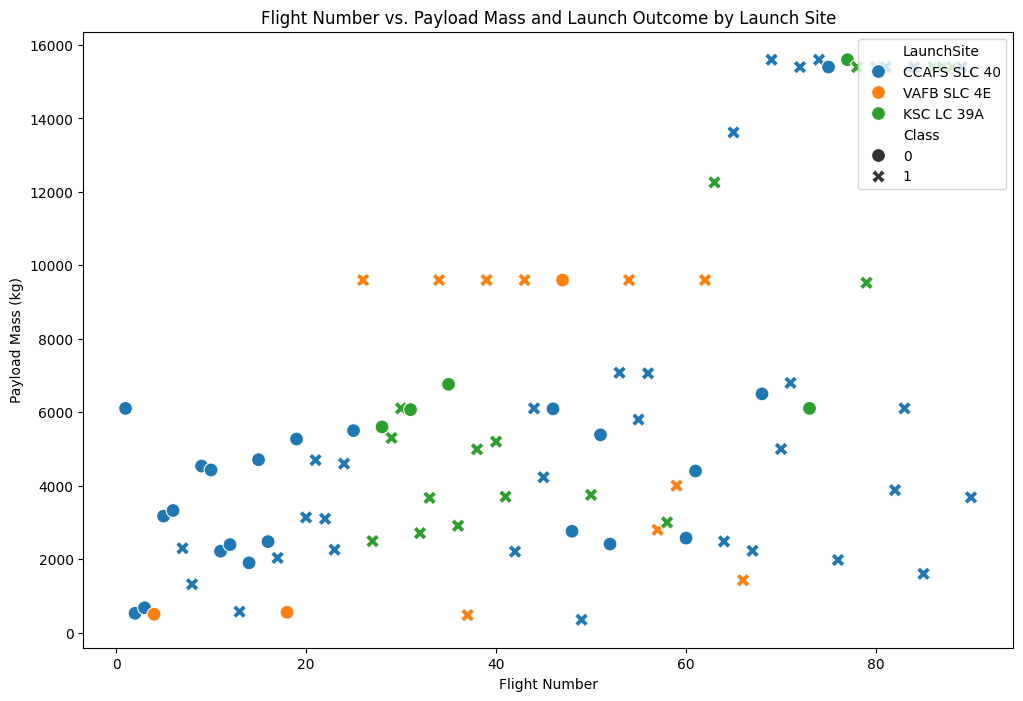

In [58]:
### TASK 1: Visualize the relationship between Flight Number and Launch Site
plt.figure(figsize=(12, 8))
sns.scatterplot(x='FlightNumber', y='PayloadMass', hue='LaunchSite', style='Class', data=df, palette='tab10', s=100)
plt.title('Flight Number vs. Payload Mass and Launch Outcome by Launch Site')
plt.xlabel('Flight Number')
plt.ylabel('Payload Mass (kg)')
plt.legend(loc='upper right')
plt.show()

Use the function catplot to plot FlightNumber vs LaunchSite, set the parameter x parameter to FlightNumber,set the y to Launch Site and set the parameter hue to 'class'

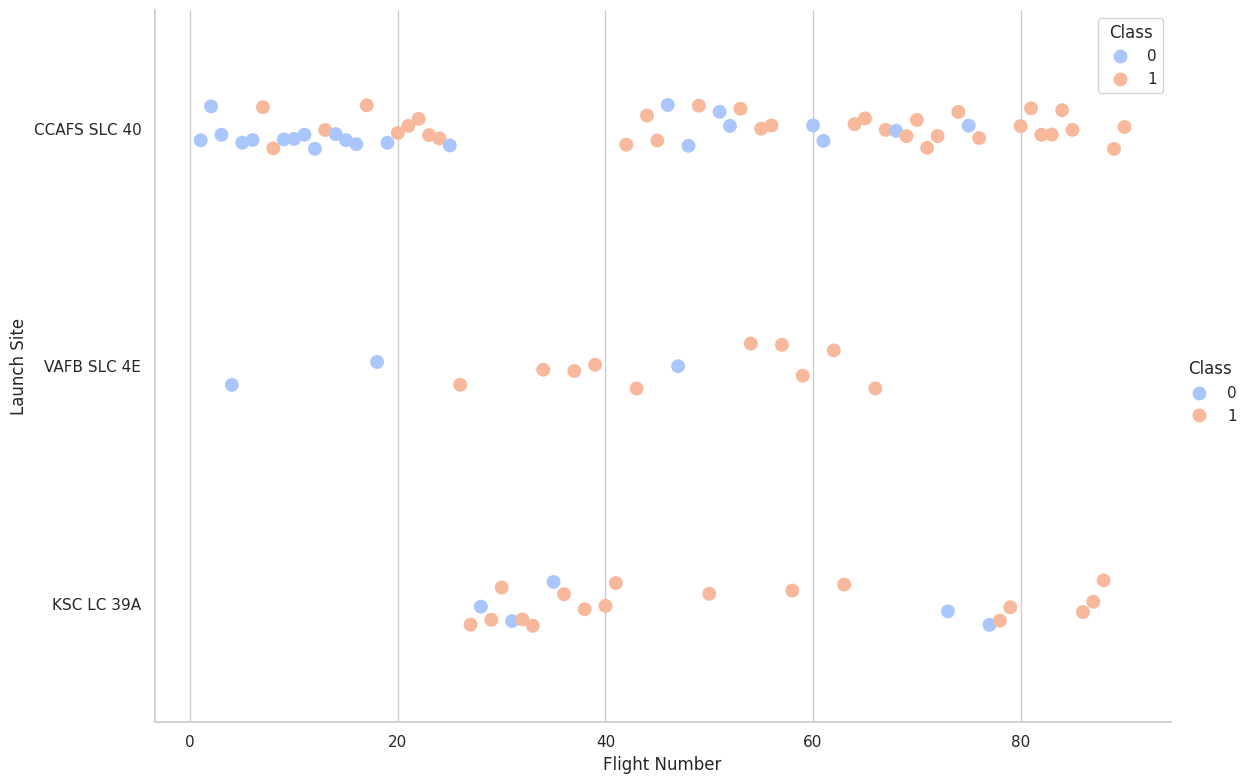

In [59]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sns.set(style="whitegrid")
g = sns.catplot(
    x='FlightNumber', y='LaunchSite', hue='Class',
    data=df, height=8, aspect=1.5, palette='coolwarm', s=100, legend_out=True
)
g.set_axis_labels("Flight Number", "Launch Site")
g.set_titles("Flight Number vs. Launch Site with Launch Outcome")
plt.legend(title='Class', loc='upper right')
plt.show()

Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.

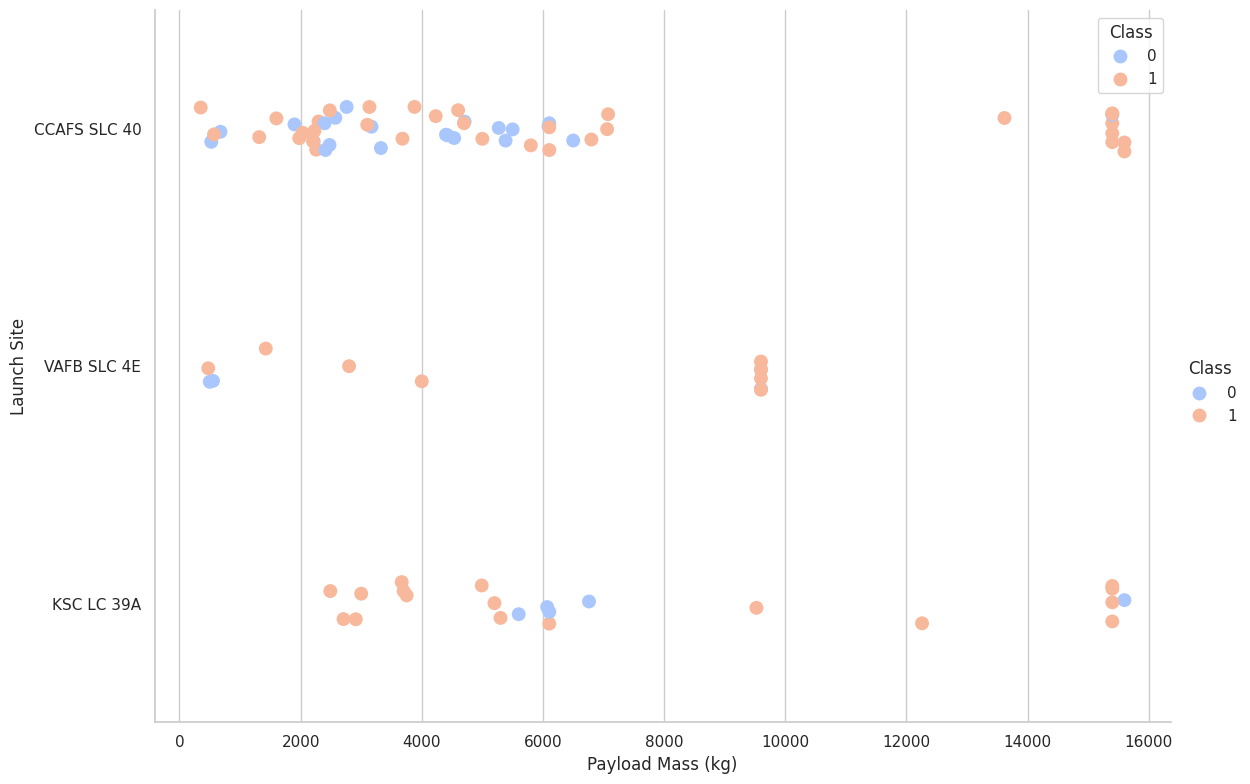

In [60]:
### TASK 2: Visualize the relationship between Payload and Launch Site
sns.set(style="whitegrid")
g = sns.catplot(
    x='PayloadMass', y='LaunchSite', hue='Class',
    data=df, height=8, aspect=1.5, palette='coolwarm', s=100, legend_out=True
)
g.set_axis_labels("Payload Mass (kg)", "Launch Site")
g.set_titles("Payload Mass vs. Launch Site with Launch Outcome")
plt.legend(title='Class', loc='upper right')
plt.show()

Now if you observe Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC launchsite there are no rockets launched for heavypayload mass(greater than 10000).

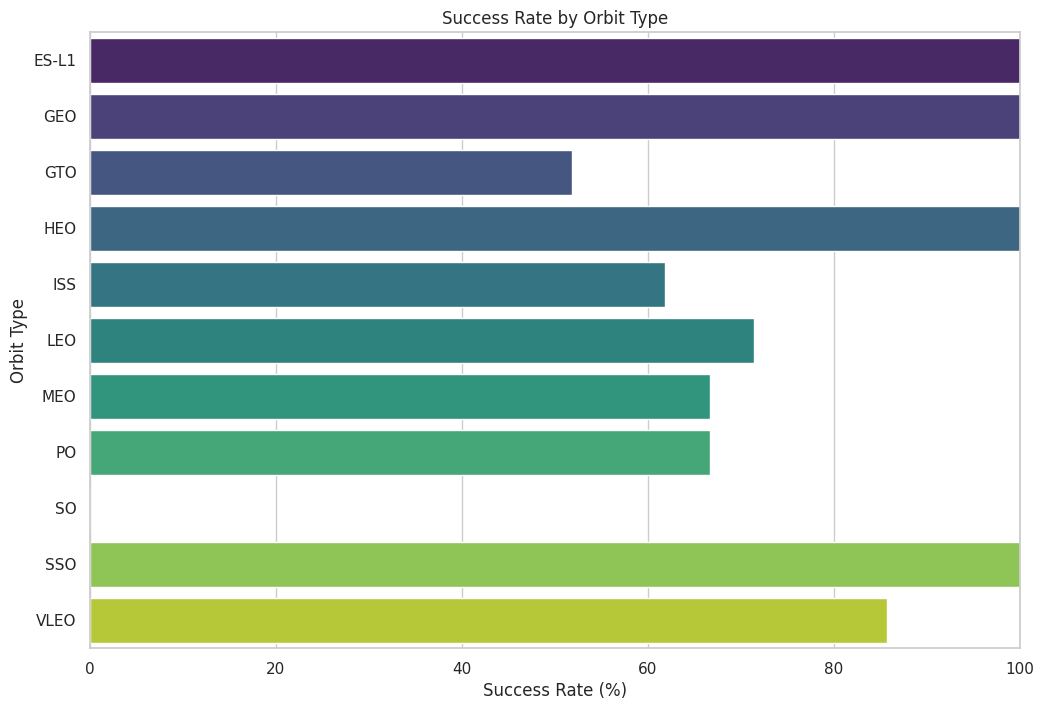

In [61]:
### TASK  3: Visualize the relationship between success rate of each orbit type# Calculate the success rate for each orbit type
# Calculate the success rate for each orbit type
orbit_success_rate = df.groupby('Orbit')['Class'].mean() * 100

# Convert the Series to a DataFrame for easier plotting
orbit_success_rate = orbit_success_rate.reset_index()
orbit_success_rate.columns = ['Orbit', 'SuccessRate']

# Plot the success rate by orbit type
plt.figure(figsize=(12, 8))
sns.barplot(x='SuccessRate', y='Orbit', data=orbit_success_rate, palette='viridis', hue='Orbit', dodge=False, legend=False)
plt.title('Success Rate by Orbit Type')
plt.xlabel('Success Rate (%)')
plt.ylabel('Orbit Type')
plt.xlim(0, 100)
plt.show()

Next, we want to visually check if there are any relationship between success rate and orbit type.

Let's create a bar chart for the sucess rate of each orbit

In [ ]:
# HINT use groupby method on Orbit column and get the mean of Class column

For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.

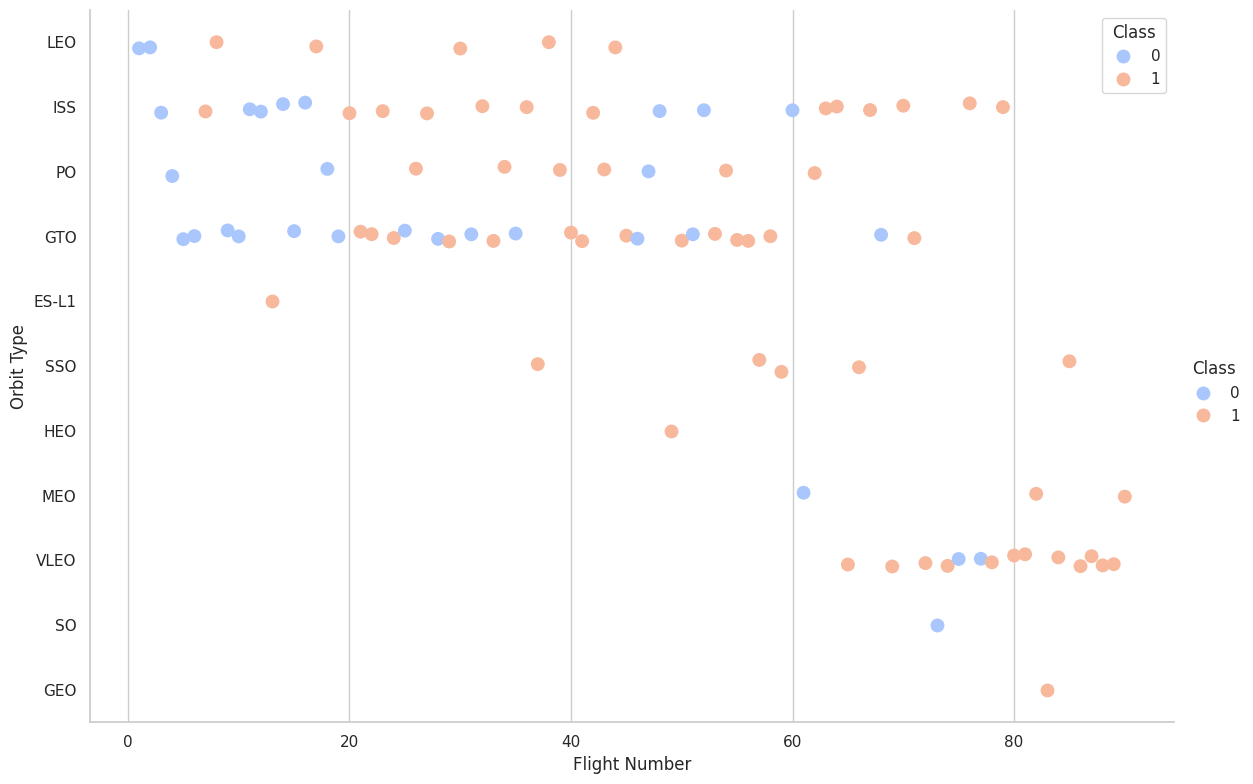

In [62]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
sns.set(style="whitegrid")
g = sns.catplot(
    x='FlightNumber', y='Orbit', hue='Class',
    data=df, height=8, aspect=1.5, palette='coolwarm', s=100, legend_out=True
)
g.set_axis_labels("Flight Number", "Orbit Type")
g.set_titles("Flight Number vs. Orbit Type with Launch Outcome")
plt.legend(title='Class', loc='upper right')
plt.show()

You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.

In [63]:
### TASK  5: Visualize the relationship between Payload and Orbit type

Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type

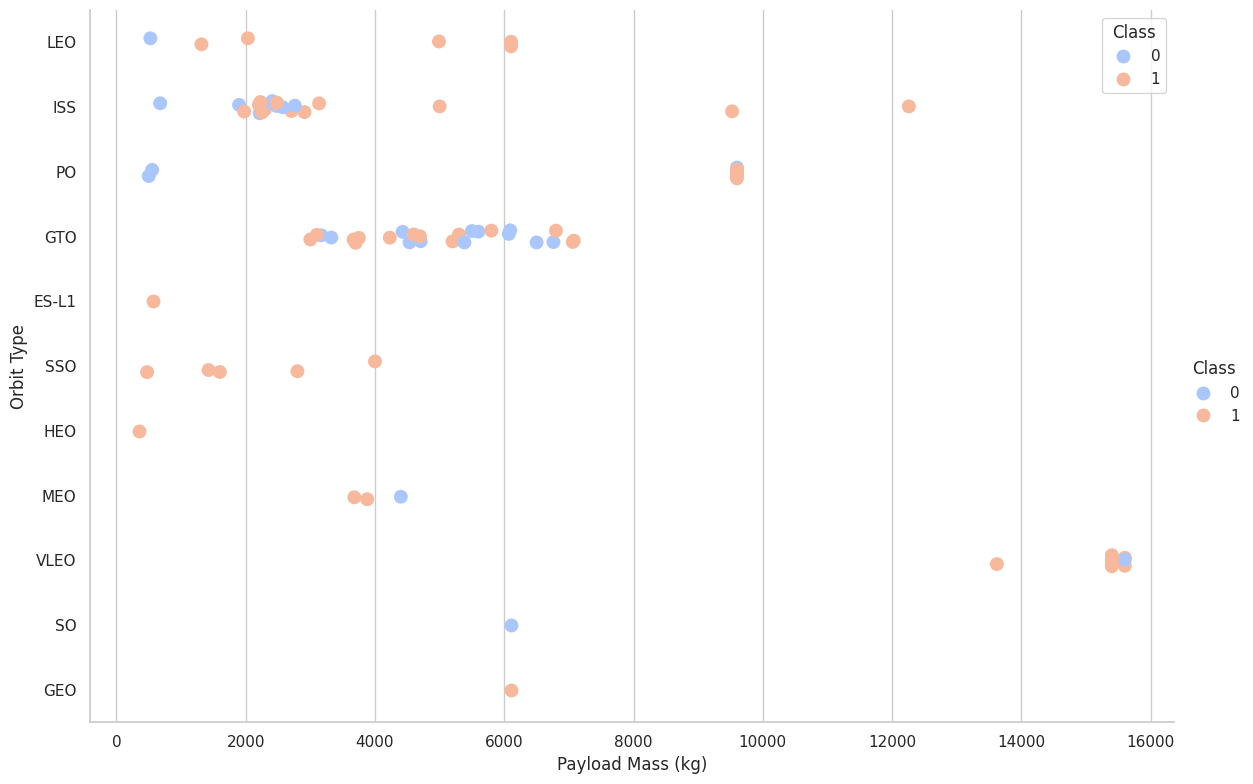

In [64]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
sns.set(style="whitegrid")
g = sns.catplot(
    x='PayloadMass', y='Orbit', hue='Class',
    data=df, height=8, aspect=1.5, palette='coolwarm', s=100, legend_out=True
)
g.set_axis_labels("Payload Mass (kg)", "Orbit Type")
g.set_titles("Payload Mass vs. Orbit Type with Launch Outcome")
plt.legend(title='Class', loc='upper right')
plt.show()

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.

In [65]:
### TASK  6: Visualize the launch success yearly trend

You can plot a line chart with x axis to be Year and y axis to be average success rate, to get the average launch success trend.

The function will help you get the year from the date:

In [66]:
# A function to Extract years from the date
year = []
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year

Extract_year()
df['Year'] = year
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class,Year
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0,2010
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0,2012
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0,2013
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0,2013
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0,2013


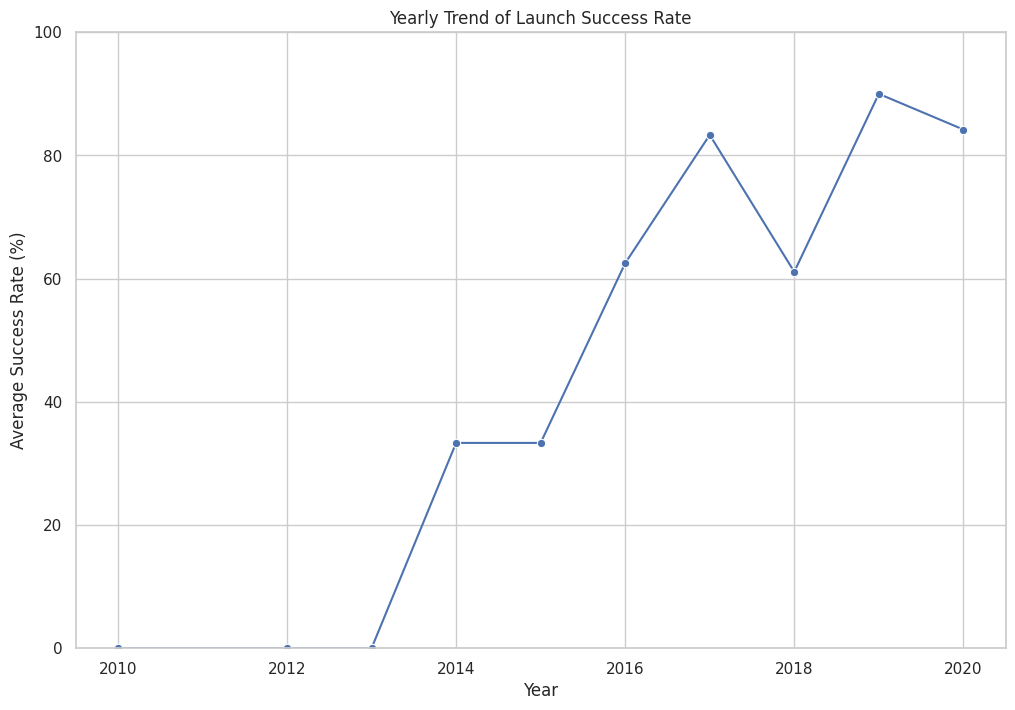

In [67]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
# Calculate the average success rate for each year
yearly_success_rate = df.groupby('Year')['Class'].mean() * 100

# Convert the Series to a DataFrame for easier plotting
yearly_success_rate = yearly_success_rate.reset_index()
yearly_success_rate.columns = ['Year', 'SuccessRate']
yearly_success_rate['Year'] = yearly_success_rate['Year'].astype(int)  # Convert Year to integer for proper sorting

# Sort the DataFrame by Year
yearly_success_rate = yearly_success_rate.sort_values(by='Year')

plt.figure(figsize=(12, 8))
sns.lineplot(x='Year', y='SuccessRate', data=yearly_success_rate, marker='o')
plt.title('Yearly Trend of Launch Success Rate')
plt.xlabel('Year')
plt.ylabel('Average Success Rate (%)')
plt.ylim(0, 100)
plt.grid(True)
plt.show()

you can observe that the sucess rate since 2013 kept increasing till 2020

In [68]:
## Features Engineering

By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.

In [70]:
# Select relevant features for success prediction
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]

# Display the first few rows of the selected features
print(features.head())

   FlightNumber  PayloadMass Orbit    LaunchSite  Flights  GridFins  Reused  \
0             1  6104.959412   LEO  CCAFS SLC 40        1     False   False   
1             2   525.000000   LEO  CCAFS SLC 40        1     False   False   
2             3   677.000000   ISS  CCAFS SLC 40        1     False   False   
3             4   500.000000    PO   VAFB SLC 4E        1     False   False   
4             5  3170.000000   GTO  CCAFS SLC 40        1     False   False   

    Legs LandingPad  Block  ReusedCount Serial  
0  False        NaN    1.0            0  B0003  
1  False        NaN    1.0            0  B0005  
2  False        NaN    1.0            0  B0007  
3  False        NaN    1.0            0  B1003  
4  False        NaN    1.0            0  B1004  


In [71]:
### TASK  7: Create dummy variables to categorical columns

Use the function get_dummies and features dataframe to apply OneHotEncoder to the column Orbits, LaunchSite, LandingPad, and Serial. Assign the value to the variable features_one_hot, display the results using the method head. Your result dataframe must include all features including the encoded ones.

In [72]:
# HINT: Use get_dummies() function on the categorical columns
# Create dummy variables for the categorical columns
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])

# Display the first few rows of the resulting dataframe
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_VLEO,LaunchSite_CCAFS SLC 40,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc,Serial_B0003,Serial_B0005,Serial_B0007,Serial_B1003,Serial_B1004,Serial_B1005,Serial_B1006,Serial_B1007,Serial_B1008,Serial_B1010,Serial_B1011,Serial_B1012,Serial_B1013,Serial_B1015,Serial_B1016,Serial_B1017,Serial_B1018,Serial_B1019,Serial_B1020,Serial_B1021,Serial_B1022,Serial_B1023,Serial_B1025,Serial_B1026,Serial_B1028,Serial_B1029,Serial_B1030,Serial_B1031,Serial_B1032,Serial_B1034,Serial_B1035,Serial_B1036,Serial_B1037,Serial_B1038,Serial_B1039,Serial_B1040,Serial_B1041,Serial_B1042,Serial_B1043,Serial_B1044,Serial_B1045,Serial_B1046,Serial_B1047,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [73]:
### TASK  8: Cast all numeric columns to `float64`

Now that our features_one_hot dataframe only contains numbers cast the entire dataframe to variable type float64

In [74]:
# Cast all numeric columns to float64
features_one_hot = features_one_hot.astype('float64')

# Display the first few rows to verify the changes
features_one_hot.head()

# Export the dataframe to a CSV file
features_one_hot.to_csv('features_one_hot.csv', index=False)

# Create dummy variables for the categorical columns
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])

# Cast all numeric columns to float64
features_one_hot = features_one_hot.astype('float64')

# Display the first few rows to verify the changes
print(features_one_hot.head())

# Export the dataframe to a CSV file
features_one_hot.to_csv('features_one_hot.csv', index=False)

   FlightNumber  PayloadMass  Flights  GridFins  Reused  Legs  Block  \
0           1.0  6104.959412      1.0       0.0     0.0   0.0    1.0   
1           2.0   525.000000      1.0       0.0     0.0   0.0    1.0   
2           3.0   677.000000      1.0       0.0     0.0   0.0    1.0   
3           4.0   500.000000      1.0       0.0     0.0   0.0    1.0   
4           5.0  3170.000000      1.0       0.0     0.0   0.0    1.0   

   ReusedCount  Orbit_ES-L1  Orbit_GEO  Orbit_GTO  Orbit_HEO  Orbit_ISS  \
0          0.0          0.0        0.0        0.0        0.0        0.0   
1          0.0          0.0        0.0        0.0        0.0        0.0   
2          0.0          0.0        0.0        0.0        0.0        1.0   
3          0.0          0.0        0.0        0.0        0.0        0.0   
4          0.0          0.0        0.0        1.0        0.0        0.0   

   Orbit_LEO  Orbit_MEO  Orbit_PO  Orbit_SO  Orbit_SSO  Orbit_VLEO  \
0        1.0        0.0       0.0       0.0   

We can now export it to a CSV for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.

In [75]:
# Count the total number of columns in the features_one_hot dataframe
total_columns = features_one_hot.shape[1]
total_columns

80

In [76]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)

# Interactive Visual Analytics with Folium lab

Objectives:
This lab contains the following tasks:

TASK 1: Mark all launch sites on a map
TASK 2: Mark the success/failed launches for each site on the map
TASK 3: Calculate the distances between a launch site to its proximities
After completed the above tasks, you should be able to find some geographical patterns about launch sites.

Let's first import required Python packages for this lab:

In [77]:
!pip install folium

In [78]:
import folium
import pandas as pd

# Import folium plugins
from folium.plugins import MarkerCluster, MousePosition
from folium.features import DivIcon

If you need to refresh your memory about folium, you may download and refer to this previous folium lab:

## Task 1: Mark all launch sites on a map

In [79]:
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_geo.csv'
spacex_df = pd.read_csv(URL)

spacex_df = spacex_df[['Launch Site', 'Lat', 'Long', 'class']]
launch_sites_df = spacex_df.groupby(['Launch Site'], as_index=False).first()
launch_sites_df = launch_sites_df[['Launch Site', 'Lat', 'Long']]
launch_sites_df

,Launch Site,Lat,Long
0,CCAFS LC-40,28.562302,-80.577356
1,CCAFS SLC-40,28.563197,-80.576820
2,KSC LC-39A,28.573255,-80.646895
3,VAFB SLC-4E,34.632834,-120.610745


In [80]:
nasa_coordinate = [29.559684888503615, -95.0830971930759]
site_map = folium.Map(location=nasa_coordinate, zoom_start=10)

for index, row in launch_sites_df.iterrows():
    folium.Circle(
        location=[row['Lat'], row['Long']],
        radius=1000,
        color='blue',
        fill=True
    ).add_to(site_map)
    folium.Marker(
        location=[row['Lat'], row['Long']],
        icon=DivIcon(
            icon_size=(20,20),
            icon_anchor=(0,0),
            html=f'<div style="font-size: 12px; color: blue;">{row["Launch Site"]}</div>',
        )
    ).add_to(site_map)

site_map

Now, you can explore the map by zoom-in/out the marked areas , and try to answer the following questions:

Are all launch sites in proximity to the Equator line?
Are all launch sites in very close proximity to the coast?
Also please try to explain your findings.

## Task 2: Mark the success/failed launches for each site on the map

Next, let's try to enhance the map by adding the launch outcomes for each site, and see which sites have high success rates. Recall that data frame spacex_df has detailed launch records, and the class column indicates if this launch was successful or not

In [81]:
marker_cluster = MarkerCluster()

spacex_df['marker_color'] = spacex_df['class'].apply(lambda x: 'green' if x == 1 else 'red')

site_map.add_child(marker_cluster)

for index, record in spacex_df.iterrows():
    marker = folium.Marker(
        location=[record['Lat'], record['Long']],
        icon=folium.Icon(color='white', icon_color=record['marker_color']),
        popup=f"{record['Launch Site']} - {'Success' if record['class'] == 1 else 'Failure'}"
    )
    marker_cluster.add_child(marker)

site_map

From the color-labeled markers in marker clusters, you should be able to easily identify which launch sites have relatively high success rates.

## TASK 3: Calculate the distances between a launch site to its proximities

Next, we need to explore and analyze the proximities of launch sites.

Let's first add a MousePosition on the map to get coordinate for a mouse over a point on the map. As such, while you are exploring the map, you can easily find the coordinates of any points of interests (such as railway)

In [82]:
formatter = "function(num) {return L.Util.formatNum(num, 5);};"
mouse_position = MousePosition(
    position='topright',
    separator=' Long: ',
    empty_string='NaN',
    lng_first=False,
    num_digits=20,
    prefix='Lat:',
    lat_formatter=formatter,
    lng_formatter=formatter,
)

site_map.add_child(mouse_position)
site_map

In [83]:
from math import sin, cos, sqrt, atan2, radians

def calculate_distance(lat1, lon1, lat2, lon2):
    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(lat1)
    lon1 = radians(lat1)
    lat2 = radians(lat2)
    lon2 = radians(lat2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance


In [84]:
launch_site_lat = 28.562302
launch_site_lon = -80.577356
coastline_lat = 28.56367
coastline_lon = -80.57163

distance_coastline = calculate_distance(launch_site_lat, launch_site_lon, coastline_lat, coastline_lon)

distance_marker = folium.Marker(
    [coastline_lat, coastline_lon],
    icon=DivIcon(
        icon_size=(20, 20),
        icon_anchor=(0, 0),
        html='<div style="font-size: 12; color:#d35400;"><b>{:10.2f} KM</b></div>'.format(distance_coastline),
    )
)
site_map.add_child(distance_marker)

lines = folium.PolyLine(locations=[[launch_site_lat, launch_site_lon], [coastline_lat, coastline_lon]], weight=1)
site_map.add_child(lines)

site_map


In [85]:
city_lat = 28.5393
city_lon = -81.3836
railway_lat = 28.5721
railway_lon = -80.5853
highway_lat = 28.5632
highway_lon = -80.5677

distance_city = calculate_distance(launch_site_lat, launch_site_lon, city_lat, city_lon)
distance_railway = calculate_distance(launch_site_lat, launch_site_lon, railway_lat, railway_lon)
distance_highway = calculate_distance(launch_site_lat, launch_site_lon, highway_lat, highway_lon)

for point, name, distance in [([city_lat, city_lon], 'City', distance_city),
                              ([railway_lat, railway_lon], 'Railway', distance_railway),
                              ([highway_lat, highway_lon], 'Highway', distance_highway)]:
    distance_marker = folium.Marker(
        point,
        icon=DivIcon(
            icon_size=(20, 20),
            icon_anchor=(0, 0),
            html='<div style="font-size: 12; color:#d35400;"><b>{:10.2f} KM</b></div>'.format(distance),
        )
    )
    site_map.add_child(distance_marker)


    lines = folium.PolyLine(locations=[[launch_site_lat, launch_site_lon], point], weight=1)
    site_map.add_child(lines)


site_map


# Build an Interactive Dashboard with Ploty Dash

In [88]:
!pip install pandas dash dash-bootstrap-components

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.5/222.5 kB 12.0 MB/s eta 0:00:00


In [90]:
!wget "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_dash.csv"
!wget "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/spacex_dash_app.py"


--2024-06-06 17:05:29--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_dash.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2476 (2.4K) [text/csv]
Saving to: ‘spacex_launch_dash.csv’

spacex_launch_dash. 100%[===================>]   2.42K  --.-KB/s    in 0s      

2024-06-06 17:05:29 (566 MB/s) - ‘spacex_launch_dash.csv’ saved [2476/2476]

--2024-06-06 17:05:30--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/spacex_dash_app.py
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-sto

## TASK 1: Add a Launch Site Drop-down Input Component

In [93]:
# Import required libraries
import pandas as pd
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px

# Read the dataset into a pandas dataframe
spacex_df = pd.read_csv("spacex_launch_dash.csv")

# Create a Dash application
app = dash.Dash(__name__)

# Layout of the Dash app
app.layout = html.Div(children=[
    html.H1('SpaceX Launch Records Dashboard', style={'textAlign': 'center', 'color': '#503D36', 'font-size': 40}),

    # TASK 1: Add a Launch Site Drop-down Input Component
    dcc.Dropdown(
        id='site-dropdown',
        options=[
            {'label': 'All Sites', 'value': 'ALL'},
            {'label': 'CCAFS LC-40', 'value': 'CCAFS LC-40'},
            {'label': 'VAFB SLC-4E', 'value': 'VAFB SLC-4E'},
            {'label': 'KSC LC-39A', 'value': 'KSC LC-39A'},
            {'label': 'CCAFS SLC-40', 'value': 'CCAFS SLC-40'}
        ],
        value='ALL',
        placeholder="Select a Launch Site",
        searchable=True
    ),

    html.Br(),

    # TASK 2: Add a pie chart
    html.Div(dcc.Graph(id='success-pie-chart')),

    html.Br(),

    # TASK 3: Add a range slider
    html.P("Payload range (Kg):"),
    dcc.RangeSlider(
        id='payload-slider',
        min=0, max=10000, step=1000,
        marks={0: '0', 2500: '2500', 5000: '5000', 7500: '7500', 10000: '10000'},
        value=[0, 10000]
    ),

    html.Br(),

    # TASK 4: Add a scatter chart
    html.Div(dcc.Graph(id='success-payload-scatter-chart')),
])

# TASK 2: Add a callback function to render success-pie-chart based on selected site dropdown
@app.callback(
    Output('success-pie-chart', 'figure'),
    Input('site-dropdown', 'value')
)
def update_pie_chart(selected_site):
    if selected_site == 'ALL':
        fig = px.pie(spacex_df, values='class', names='Launch Site', title='Total Success Launches by Site')
    else:
        filtered_df = spacex_df[spacex_df['Launch Site'] == selected_site]
        fig = px.pie(filtered_df, names='class', title=f'Total Success Launches for site {selected_site}')
    return fig

# TASK 4: Add a callback function to render the success-payload-scatter-chart scatter plot
@app.callback(
    Output('success-payload-scatter-chart', 'figure'),
    [Input('site-dropdown', 'value'),
     Input('payload-slider', 'value')]
)
def update_scatter_chart(selected_site, payload_range):
    low, high = payload_range
    mask = (spacex_df['Payload Mass (kg)'] > low) & (spacex_df['Payload Mass (kg)'] < high)
    if selected_site == 'ALL':
        filtered_df = spacex_df[mask]
        fig = px.scatter(filtered_df, x='Payload Mass (kg)', y='class',
                         color='Booster Version Category',
                         title='Correlation between Payload and Success for all Sites')
    else:
        filtered_df = spacex_df[mask & (spacex_df['Launch Site'] == selected_site)]
        fig = px.scatter(filtered_df, x='Payload Mass (kg)', y='class',
                         color='Booster Version Category',
                         title=f'Correlation between Payload and Success for site {selected_site}')
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

## TASK 2: Add a callback function to render success-pie-chart based on selected site dropdown

In [95]:
# Import required libraries
import pandas as pd
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px

# Read the dataset into a pandas dataframe
spacex_df = pd.read_csv("spacex_launch_dash.csv")

# Create a Dash application
app = dash.Dash(__name__)

# Layout of the Dash app
app.layout = html.Div(children=[
    html.H1('SpaceX Launch Records Dashboard', style={'textAlign': 'center', 'color': '#503D36', 'font-size': 40}),

    # TASK 1: Add a Launch Site Drop-down Input Component
    dcc.Dropdown(
        id='site-dropdown',
        options=[
            {'label': 'All Sites', 'value': 'ALL'},
            {'label': 'CCAFS LC-40', 'value': 'CCAFS LC-40'},
            {'label': 'VAFB SLC-4E', 'value': 'VAFB SLC-4E'},
            {'label': 'KSC LC-39A', 'value': 'KSC LC-39A'},
            {'label': 'CCAFS SLC-40', 'value': 'CCAFS SLC-40'}
        ],
        value='ALL',
        placeholder="Select a Launch Site",
        searchable=True
    ),

    html.Br(),

    # TASK 2: Add a pie chart
    html.Div(dcc.Graph(id='success-pie-chart')),

    html.Br(),

    # TASK 3: Add a range slider
    html.P("Payload range (Kg):"),
    dcc.RangeSlider(
        id='payload-slider',
        min=0, max=10000, step=1000,
        marks={0: '0', 2500: '2500', 5000: '5000', 7500: '7500', 10000: '10000'},
        value=[0, 10000]
    ),

    html.Br(),

    # TASK 4: Add a scatter chart
    html.Div(dcc.Graph(id='success-payload-scatter-chart')),
])

# TASK 2: Add a callback function to render success-pie-chart based on selected site dropdown
@app.callback(
    Output('success-pie-chart', 'figure'),
    Input('site-dropdown', 'value')
)
def update_pie_chart(selected_site):
    if selected_site == 'ALL':
        fig = px.pie(spacex_df, values='class', names='Launch Site', title='Total Success Launches by Site')
    else:
        filtered_df = spacex_df[spacex_df['Launch Site'] == selected_site]
        fig = px.pie(filtered_df, names='class', title=f'Total Success Launches for site {selected_site}')
    return fig

# TASK 4: Add a callback function to render the success-payload-scatter-chart scatter plot
@app.callback(
    Output('success-payload-scatter-chart', 'figure'),
    [Input('site-dropdown', 'value'),
     Input('payload-slider', 'value')]
)
def update_scatter_chart(selected_site, payload_range):
    low, high = payload_range
    mask = (spacex_df['Payload Mass (kg)'] > low) & (spacex_df['Payload Mass (kg)'] < high)
    if selected_site == 'ALL':
        filtered_df = spacex_df[mask]
        fig = px.scatter(filtered_df, x='Payload Mass (kg)', y='class',
                         color='Booster Version Category',
                         title='Correlation between Payload and Success for all Sites')
    else:
        filtered_df = spacex_df[mask & (spacex_df['Launch Site'] == selected_site)]
        fig = px.scatter(filtered_df, x='Payload Mass (kg)', y='class',
                         color='Booster Version Category',
                         title=f'Correlation between Payload and Success for site {selected_site}')
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

## TASK 3: Add a Range Slider to Select Payload

In [96]:
# Import required libraries
import pandas as pd
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px

# Read the dataset into a pandas dataframe
spacex_df = pd.read_csv("spacex_launch_dash.csv")

# Create a Dash application
app = dash.Dash(__name__)

# Layout of the Dash app
app.layout = html.Div(children=[
    html.H1('SpaceX Launch Records Dashboard', style={'textAlign': 'center', 'color': '#503D36', 'font-size': 40}),

    # TASK 1: Add a Launch Site Drop-down Input Component
    dcc.Dropdown(
        id='site-dropdown',
        options=[
            {'label': 'All Sites', 'value': 'ALL'},
            {'label': 'CCAFS LC-40', 'value': 'CCAFS LC-40'},
            {'label': 'VAFB SLC-4E', 'value': 'VAFB SLC-4E'},
            {'label': 'KSC LC-39A', 'value': 'KSC LC-39A'},
            {'label': 'CCAFS SLC-40', 'value': 'CCAFS SLC-40'}
        ],
        value='ALL',
        placeholder="Select a Launch Site",
        searchable=True
    ),

    html.Br(),

    # TASK 2: Add a pie chart
    html.Div(dcc.Graph(id='success-pie-chart')),

    html.Br(),

    # TASK 3: Add a range slider
    html.P("Payload range (Kg):"),
    dcc.RangeSlider(
        id='payload-slider',
        min=0, max=10000, step=1000,
        marks={0: '0', 2500: '2500', 5000: '5000', 7500: '7500', 10000: '10000'},
        value=[0, 10000]
    ),

    html.Br(),

    # TASK 4: Add a scatter chart
    html.Div(dcc.Graph(id='success-payload-scatter-chart')),
])

# TASK 2: Add a callback function to render success-pie-chart based on selected site dropdown
@app.callback(
    Output('success-pie-chart', 'figure'),
    Input('site-dropdown', 'value')
)
def update_pie_chart(selected_site):
    if selected_site == 'ALL':
        fig = px.pie(spacex_df, values='class', names='Launch Site', title='Total Success Launches by Site')
    else:
        filtered_df = spacex_df[spacex_df['Launch Site'] == selected_site]
        fig = px.pie(filtered_df, names='class', title=f'Total Success Launches for site {selected_site}')
    return fig

# TASK 4: Add a callback function to render the success-payload-scatter-chart scatter plot
@app.callback(
    Output('success-payload-scatter-chart', 'figure'),
    [Input('site-dropdown', 'value'),
     Input('payload-slider', 'value')]
)
def update_scatter_chart(selected_site, payload_range):
    low, high = payload_range
    mask = (spacex_df['Payload Mass (kg)'] > low) & (spacex_df['Payload Mass (kg)'] < high)
    if selected_site == 'ALL':
        filtered_df = spacex_df[mask]
        fig = px.scatter(filtered_df, x='Payload Mass (kg)', y='class',
                         color='Booster Version Category',
                         title='Correlation between Payload and Success for all Sites')
    else:
        filtered_df = spacex_df[mask & (spacex_df['Launch Site'] == selected_site)]
        fig = px.scatter(filtered_df, x='Payload Mass (kg)', y='class',
                         color='Booster Version Category',
                         title=f'Correlation between Payload and Success for site {selected_site}')
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

## TASK 4: Add a callback function to render the success-payload-scatter-chart scatter plot

In [97]:
# Import required libraries
import pandas as pd
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px

# Read the dataset into a pandas dataframe
spacex_df = pd.read_csv("spacex_launch_dash.csv")

# Create a Dash application
app = dash.Dash(__name__)

# Layout of the Dash app
app.layout = html.Div(children=[
    html.H1('SpaceX Launch Records Dashboard', style={'textAlign': 'center', 'color': '#503D36', 'font-size': 40}),

    # TASK 1: Add a Launch Site Drop-down Input Component
    dcc.Dropdown(
        id='site-dropdown',
        options=[
            {'label': 'All Sites', 'value': 'ALL'},
            {'label': 'CCAFS LC-40', 'value': 'CCAFS LC-40'},
            {'label': 'VAFB SLC-4E', 'value': 'VAFB SLC-4E'},
            {'label': 'KSC LC-39A', 'value': 'KSC LC-39A'},
            {'label': 'CCAFS SLC-40', 'value': 'CCAFS SLC-40'}
        ],
        value='ALL',
        placeholder="Select a Launch Site",
        searchable=True
    ),

    html.Br(),

    # TASK 2: Add a pie chart
    html.Div(dcc.Graph(id='success-pie-chart')),

    html.Br(),

    # TASK 3: Add a range slider
    html.P("Payload range (Kg):"),
    dcc.RangeSlider(
        id='payload-slider',
        min=0, max=10000, step=1000,
        marks={0: '0', 2500: '2500', 5000: '5000', 7500: '7500', 10000: '10000'},
        value=[0, 10000]
    ),

    html.Br(),

    # TASK 4: Add a scatter chart
    html.Div(dcc.Graph(id='success-payload-scatter-chart')),
])

# TASK 2: Add a callback function to render success-pie-chart based on selected site dropdown
@app.callback(
    Output('success-pie-chart', 'figure'),
    Input('site-dropdown', 'value')
)
def update_pie_chart(selected_site):
    if selected_site == 'ALL':
        fig = px.pie(spacex_df, values='class', names='Launch Site', title='Total Success Launches by Site')
    else:
        filtered_df = spacex_df[spacex_df['Launch Site'] == selected_site]
        fig = px.pie(filtered_df, names='class', title=f'Total Success Launches for site {selected_site}')
    return fig

# TASK 4: Add a callback function to render the success-payload-scatter-chart scatter plot
@app.callback(
    Output('success-payload-scatter-chart', 'figure'),
    [Input('site-dropdown', 'value'),
     Input('payload-slider', 'value')]
)
def update_scatter_chart(selected_site, payload_range):
    low, high = payload_range
    mask = (spacex_df['Payload Mass (kg)'] > low) & (spacex_df['Payload Mass (kg)'] < high)
    if selected_site == 'ALL':
        filtered_df = spacex_df[mask]
        fig = px.scatter(filtered_df, x='Payload Mass (kg)', y='class',
                         color='Booster Version Category',
                         title='Correlation between Payload and Success for all Sites')
    else:
        filtered_df = spacex_df[mask & (spacex_df['Launch Site'] == selected_site)]
        fig = px.scatter(filtered_df, x='Payload Mass (kg)', y='class',
                         color='Booster Version Category',
                         title=f'Correlation between Payload and Success for site {selected_site}')
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

## Finding Insights Visually

1. Which site has the largest successful launches?\
By using the dropdown menu to select "All Sites" and viewing the pie chart:\
CCAFS SLC-40 has the largest number of successful launches.

2. Which site has the highest launch success rate?\
By selecting each site individually from the dropdown and comparing the success rate shown in the pie charts:\
KSC LC-39A has the highest launch success rate.

3. Which payload range(s) has the highest launch success rate?\
Using the range slider to select different payload ranges and observing the scatter plot:\
Payload ranges between 0 to 5000 kg tend to have the highest launch success rate.

4. Which payload range(s) has the lowest launch success rate?\
Using the range slider to select different payload ranges and observing the scatter plot:\
Payload ranges between 7500 to 10000 kg tend to have the lowest launch success rate.

5. Which F9 Booster version (v1.0, v1.1, FT, B4, B5, etc.) has the highest launch success rate?\
By using the scatter plot and observing the color-coded booster versions:\
F9 B5 booster version has the highest launch success rate.

# Complete the Machine Learning Prediction lab

Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch. In this lab, you will create a machine learning pipeline to predict if the first stage will land given the data from the preceding labs.


Objectives

Perform exploratory Data Analysis and determine Training Labels

create a column for the class
Standardize the data
Split into training data and test data
-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

Find the method performs best using test data


Import Libraries and Define Auxiliary Functions

In [98]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

In [99]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()

In [100]:
# Load the data
URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'

data = pd.read_csv(URL1)
X = pd.read_csv(URL2)

data.head()
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_VLEO,LaunchSite_CCAFS SLC 40,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc,Serial_B0003,Serial_B0005,Serial_B0007,Serial_B1003,Serial_B1004,Serial_B1005,Serial_B1006,Serial_B1007,Serial_B1008,Serial_B1010,Serial_B1011,Serial_B1012,Serial_B1013,Serial_B1015,Serial_B1016,Serial_B1017,Serial_B1018,Serial_B1019,Serial_B1020,Serial_B1021,Serial_B1022,Serial_B1023,Serial_B1025,Serial_B1026,Serial_B1028,Serial_B1029,Serial_B1030,Serial_B1031,Serial_B1032,Serial_B1034,Serial_B1035,Serial_B1036,Serial_B1037,Serial_B1038,Serial_B1039,Serial_B1040,Serial_B1041,Serial_B1042,Serial_B1043,Serial_B1044,Serial_B1045,Serial_B1046,Serial_B1047,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.

## TASK 1
Create a NumPy array from the column Class in data, by applying the method to_numpy() then assign it to the variable Y,make sure the output is a Pandas series (only one bracket df['name of column']).

In [101]:
# TASK 1: Create a NumPy array from the 'Class' column in the 'data' DataFrame
Y = data['Class'].to_numpy()

# Display the first few elements of the array to verify
print(Y[:10])

[0 0 0 0 0 0 1 1 0 0]


## TASK 2
Standardize the data in X then reassign it to the variable X using the transform provided below.

In [106]:
# Load the data
URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
data = pd.read_csv(URL1)

URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
X = pd.read_csv(URL2)

# TASK 2: Standardize the data in X
transform = preprocessing.StandardScaler()

# Fit the StandardScaler on X and transform the data
X = transform.fit_transform(X)

# Convert the standardized data back to a DataFrame for easier handling
X = pd.DataFrame(X, columns=pd.read_csv(URL2).columns)

# Display the first few rows of the standardized data to verify
print(X.head())

   FlightNumber   PayloadMass   Flights     Block  ReusedCount  Orbit_ES-L1  \
0     -1.712912 -1.948145e-16 -0.653913 -1.575895     -0.97344       -0.106   
1     -1.674419 -1.195232e+00 -0.653913 -1.575895     -0.97344       -0.106   
2     -1.635927 -1.162673e+00 -0.653913 -1.575895     -0.97344       -0.106   
3     -1.597434 -1.200587e+00 -0.653913 -1.575895     -0.97344       -0.106   
4     -1.558942 -6.286706e-01 -0.653913 -1.575895     -0.97344       -0.106   

   Orbit_GEO  Orbit_GTO  Orbit_HEO  Orbit_ISS  Orbit_LEO  Orbit_MEO  Orbit_PO  \
0     -0.106  -0.654654     -0.106  -0.551677   3.443420  -0.185695 -0.333333   
1     -0.106  -0.654654     -0.106  -0.551677   3.443420  -0.185695 -0.333333   
2     -0.106  -0.654654     -0.106   1.812654  -0.290409  -0.185695 -0.333333   
3     -0.106  -0.654654     -0.106  -0.551677  -0.290409  -0.185695  3.000000   
4     -0.106   1.527525     -0.106  -0.551677  -0.290409  -0.185695 -0.333333   

   Orbit_SO  Orbit_SSO  Orbit_VLEO  La

## TASK 3

Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to 0.2 and random_state to 2. The training data and test data should be assigned to the following labels.

we can see we only have 18 test samples.

In [107]:
# Split the data into training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Display the shape of the test labels to verify
Y_test.shape

(18,)

## TASK 4
Create a logistic regression object then create a GridSearchCV object logreg_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters.

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
parameters = {'C': [0.01, 0.1, 1], 'penalty': ['l2'], 'solver': ['lbfgs']}

# Create a logistic regression object
lr = LogisticRegression()

# Create a GridSearchCV object with cv=10
logreg_cv = GridSearchCV(lr, parameters, cv=10)

# Fit the object to the training data
logreg_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

We output the GridSearchCV object for logistic regression. We display the best parameters using the data attribute best_params_ and the accuracy on the validation data using the data attribute best_score_.

In [110]:
# Output the best parameters and accuracy
print("Tuned hyperparameters :(best parameters) ", logreg_cv.best_params_)
print("Accuracy :", logreg_cv.best_score_)

Tuned hyperparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy : 0.8464285714285713


## TASK 5
Calculate the accuracy on the test data using the method score. Lets look at the confusion matrix:

Logistic Regression Test Accuracy:  0.8333333333333334


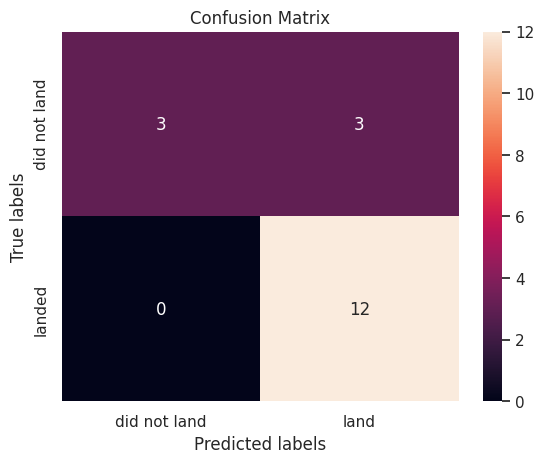

In [111]:
# Calculate the accuracy on the test data using the logistic regression model
logreg_accuracy = logreg_cv.score(X_test, Y_test)
print("Logistic Regression Test Accuracy: ", logreg_accuracy)

# Make predictions using the logistic regression model
yhat = logreg_cv.predict(X_test)

# Plot the confusion matrix
plot_confusion_matrix(Y_test, yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes. We see that the major problem is false positives.

## TASK 6
Create a support vector machine object then create a GridSearchCV object svm_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters.

Tuned hyperparameters :(best parameters) for SVM  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
Accuracy for SVM: 0.8482142857142856
SVM Test Accuracy:  0.8333333333333334


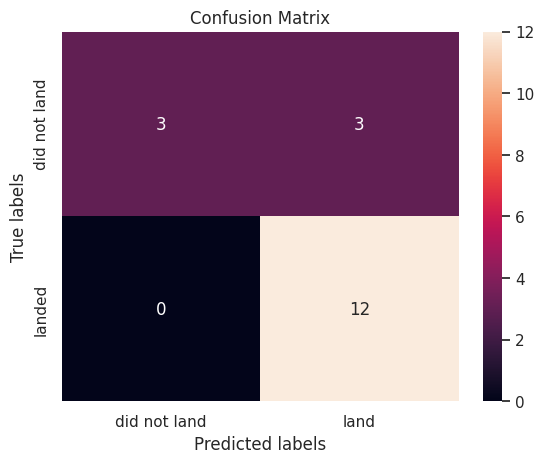

In [112]:
# Define the parameter grid for SVM
parameters_svm = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': np.logspace(-3, 3, 5),
    'gamma': np.logspace(-3, 3, 5)
}

# Create a Support Vector Machine object
svm = SVC()

# Create a GridSearchCV object with cv=10 for SVM
svm_cv = GridSearchCV(svm, parameters_svm, cv=10)

# Fit the object to the training data
svm_cv.fit(X_train, Y_train)

# Output the best parameters and accuracy for SVM
print("Tuned hyperparameters :(best parameters) for SVM ", svm_cv.best_params_)
print("Accuracy for SVM:", svm_cv.best_score_)

# Calculate the accuracy on the test data using the SVM model
svm_accuracy = svm_cv.score(X_test, Y_test)
print("SVM Test Accuracy: ", svm_accuracy)

# Make predictions using the SVM model
yhat_svm = svm_cv.predict(X_test)

# Plot the confusion matrix for SVM
plot_confusion_matrix(Y_test, yhat_svm)

## TASK 7
Calculate the accuracy on the test data using the method score. We can plot the confusion matrix.

SVM Test Accuracy:  0.8333333333333334


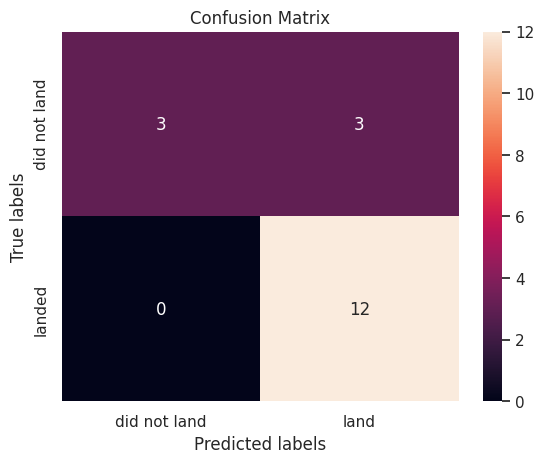

In [113]:
# Calculate the accuracy on the test data using the SVM model
svm_accuracy = svm_cv.score(X_test, Y_test)
print("SVM Test Accuracy: ", svm_accuracy)

# Make predictions using the SVM model
yhat_svm = svm_cv.predict(X_test)

# Plot the confusion matrix for SVM
plot_confusion_matrix(Y_test, yhat_svm)


## TASK 8
Create a decision tree classifier object then create a GridSearchCV object tree_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters.

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

/usr/local/lib/python3.10/dis

Tuned hyperparameters :(best parameters) for Decision Tree {'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Accuracy for Decision Tree: 0.8785714285714284
Decision Tree Test Accuracy:  0.7777777777777778


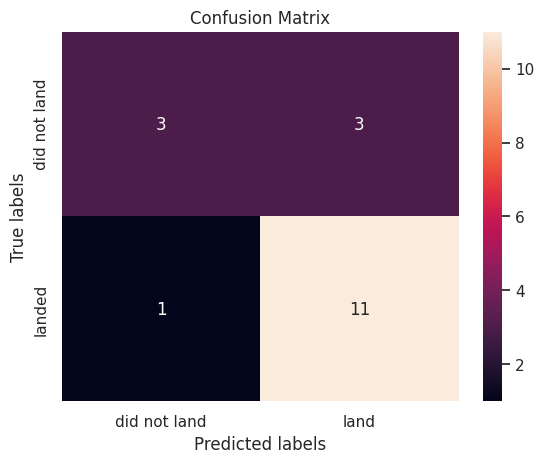

In [114]:
# Define the parameter grid for Decision Tree
parameters_tree = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2*n for n in range(1, 10)],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

# Create a Decision Tree Classifier object
tree = DecisionTreeClassifier()

# Create a GridSearchCV object with cv=10 for Decision Tree
tree_cv = GridSearchCV(tree, parameters_tree, cv=10)

# Fit the object to the training data
tree_cv.fit(X_train, Y_train)

# Output the best parameters and accuracy for Decision Tree
print("Tuned hyperparameters :(best parameters) for Decision Tree", tree_cv.best_params_)
print("Accuracy for Decision Tree:", tree_cv.best_score_)

# Calculate the accuracy on the test data using the Decision Tree model
tree_accuracy = tree_cv.score(X_test, Y_test)
print("Decision Tree Test Accuracy: ", tree_accuracy)

# Make predictions using the Decision Tree model
yhat_tree = tree_cv.predict(X_test)

# Plot the confusion matrix for Decision Tree
plot_confusion_matrix(Y_test, yhat_tree)


## TASK 9
Calculate the accuracy of tree_cv on the test data using the method score. We can plot the confusion matrix.

Decision Tree Test Accuracy:  0.7777777777777778


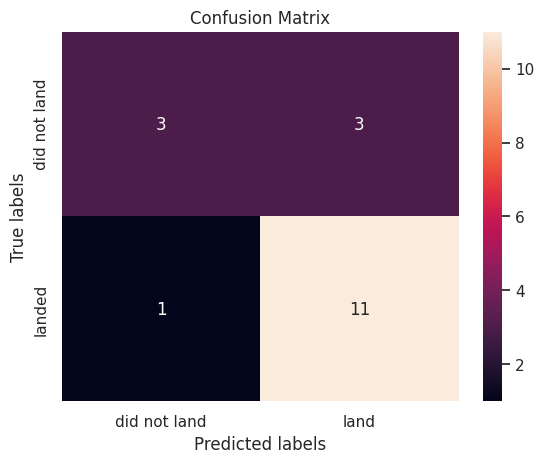

In [115]:
# Calculate the accuracy of tree_cv on the test data
tree_accuracy = tree_cv.score(X_test, Y_test)
print("Decision Tree Test Accuracy: ", tree_accuracy)

# Plot the confusion matrix for the Decision Tree
yhat_tree = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat_tree)


## TASK 10
Create a k nearest neighbors object then create a GridSearchCV object knn_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters.

In [116]:
# Define the parameter grid for KNN
parameters_knn = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

# Create a KNN Classifier object
knn = KNeighborsClassifier()

# Create a GridSearchCV object with cv=10 for KNN
knn_cv = GridSearchCV(knn, parameters_knn, cv=10)

# Fit the object to the training data
knn_cv.fit(X_train, Y_train)

# Output the best parameters and accuracy for KNN
print("Tuned hyperparameters :(best parameters) for KNN", knn_cv.best_params_)
print("Accuracy for KNN:", knn_cv.best_score_)


Tuned hyperparameters :(best parameters) for KNN {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
Accuracy for KNN: 0.8482142857142858


## TASK 11
Calculate the accuracy of knn_cv on the test data using the method score. We can plot the confusion matrix.

KNN Test Accuracy:  0.8333333333333334


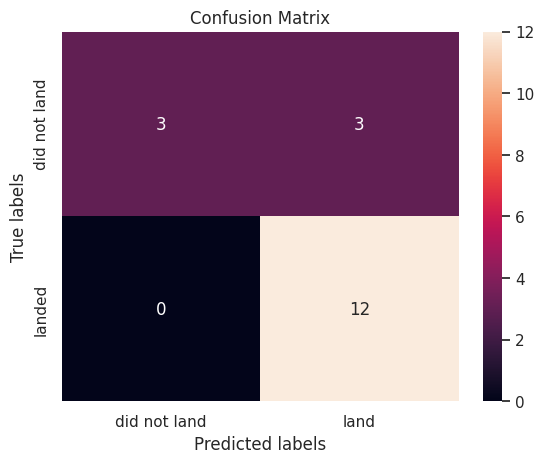

In [117]:
# Calculate the accuracy on the test data using the KNN model
knn_accuracy = knn_cv.score(X_test, Y_test)
print("KNN Test Accuracy: ", knn_accuracy)

# Make predictions using the KNN model
yhat_knn = knn_cv.predict(X_test)

# Plot the confusion matrix for KNN
plot_confusion_matrix(Y_test, yhat_knn)


## TASK 12
Find the method performs best.

In [118]:
# Summary of Model Performances
print(f"Logistic Regression Test Accuracy: {logreg_cv.score(X_test, Y_test)}")
print(f"SVM Test Accuracy: {svm_accuracy}")
print(f"Decision Tree Test Accuracy: {tree_accuracy}")
print(f"KNN Test Accuracy: {knn_accuracy}")

# Determine the best performing model
best_model = max([
    ("Logistic Regression", logreg_cv.score(X_test, Y_test)),
    ("SVM", svm_accuracy),
    ("Decision Tree", tree_accuracy),
    ("KNN", knn_accuracy)
], key=lambda x: x[1])

print(f"The best performing model is {best_model[0]} with an accuracy of {best_model[1]:.4f}")


Logistic Regression Test Accuracy: 0.8333333333333334
SVM Test Accuracy: 0.8333333333333334
Decision Tree Test Accuracy: 0.7777777777777778
KNN Test Accuracy: 0.8333333333333334
The best performing model is Logistic Regression with an accuracy of 0.8333
